## Imports

In [192]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from datetime import datetime
import pytz
import json
import math

## Getting the data ready to be analyzed

In [193]:
spanish_wikibreaks_df = pd.read_json('../../wikidump/wikibreaks_refactored/eswiki_20210201_refactored_wikibreaks_dataset.json.gz', compression='gzip', lines=True)
# spanish_wikibreaks_df.head()

In [194]:
active_users_amount_file = open('../../wikidump/wikibreaks_refactored/eswiki_active_users.json')
active_users_amount = json.load(active_users_amount_file)
active_users_amount_file.close()

Number of rows and columns

In [195]:
spanish_wikibreaks_df.shape

(2151, 5)

Basic info about the Pandas dataframe

In [196]:
spanish_wikibreaks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2151 entries, 0 to 2150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_user_page  1632 non-null   float64
 1   wikibreaks    2151 non-null   object 
 2   ambiguous     2151 non-null   bool   
 3   name          2151 non-null   object 
 4   id_talk_page  892 non-null    float64
dtypes: bool(1), float64(2), object(2)
memory usage: 69.4+ KB


Basic stats

In [197]:
spanish_wikibreaks_df.describe()

,id_user_page,id_talk_page
count,1.632000e+03,8.920000e+02
mean,3.177841e+06,3.619830e+06
std,2.742796e+06,2.685305e+06
min,4.844000e+03,4.876900e+04
25%,9.850000e+05,1.204399e+06
50%,1.985881e+06,3.082950e+06
75%,5.069600e+06,5.367032e+06
max,9.721820e+06,9.777103e+06


#### Plot the graph chart to see ambiguous information retrieved

In [198]:
ambiguous_count = spanish_wikibreaks_df
ambiguous_count['count'] = 1
ambiguous_count = ambiguous_count[['ambiguous', 'count']].groupby('ambiguous').count().reset_index()
ambiguous_count

,ambiguous,count
0,False,1957
1,True,194


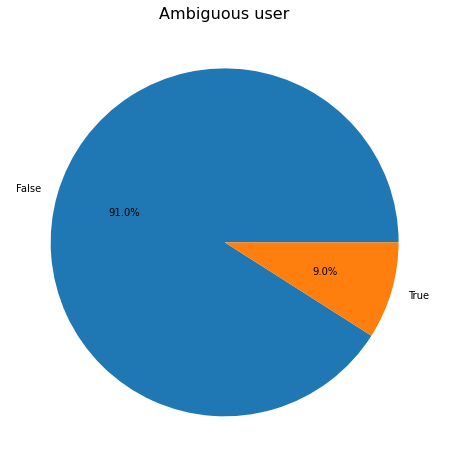

In [199]:
plt.figure(figsize=(16,8))
plt.pie(ambiguous_count['count'], labels=ambiguous_count['ambiguous'], autopct='%.1f%%')
plt.title('Ambiguous user', fontsize=16)
plt.show()

### Explicit the Wikibreaks

In [200]:
spanish_wikibreaks_refactored_df = list()
# iterating over the previous dataset
for i, row in spanish_wikibreaks_df.iterrows():
    # explicit the wikibreaks
    for el in row['wikibreaks']:
        new_row = row
        new_row = new_row.drop('wikibreaks')
        new_row['wikibreak'] = el['name']
        new_row['categories'] = el['categories']
        new_row['parameters'] = el['parameters']
        new_row['subcategory'] = el['subcategory']
        if el['to_date']:
            new_row['to_date'] = datetime.fromisoformat(el['to_date'])
        else:
            new_row['to_date'] = None
        new_row['from_date'] = datetime.fromisoformat(el['from_date'])
        spanish_wikibreaks_refactored_df.append(new_row)
spanish_wikibreaks_refactored_df = pd.DataFrame(spanish_wikibreaks_refactored_df).reset_index(drop=True)
# spanish_wikibreaks_refactored_df.head()

## Number of users still in wikibreaks or similar

In [201]:
still_in_breaks = spanish_wikibreaks_refactored_df.loc[pd.isnull(spanish_wikibreaks_refactored_df['to_date']), ['name', 'wikibreak', 'categories', 'subcategory']]
# still_in_breaks.head()

In [202]:
# still_in_breaks.describe()

In [203]:
users_still_in_breaks = still_in_breaks.groupby('name').count().reset_index()
# users_still_in_breaks.head()

In [204]:
users_still_in_breaks.describe()

,wikibreak,categories,subcategory
count,1111.000000,1111.000000,1111.000000
mean,1.155716,1.155716,1.155716
std,0.362749,0.362749,0.362749
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000
max,2.000000,2.000000,2.000000


## Number of users still in wikibreaks with respect to the total amount of users who specified at least a wikibreak during their wikihistory

In [205]:
spanish_wikibreaks_df.shape[0]

2151

In [206]:
users_still_in_breaks.shape[0]

1111

In [207]:
row_total = {'total': spanish_wikibreaks_df.shape[0] - users_still_in_breaks.shape[0], 'label': 'not in break'}
row_break = {'total': users_still_in_breaks.shape[0], 'label': 'in break'}
rows = [row_total, row_break]
percentage_still_in_break = pd.DataFrame(rows).reset_index(drop=True)
percentage_still_in_break

,total,label
0,1040,not in break
1,1111,in break


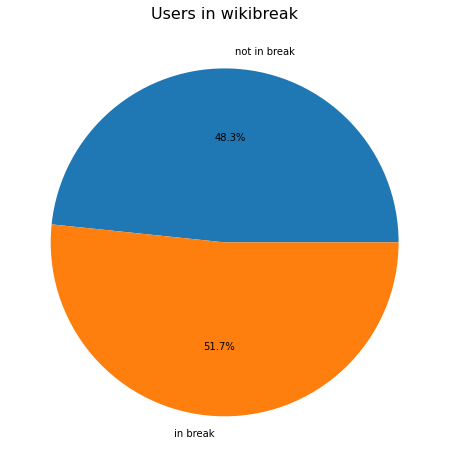

In [208]:
plt.figure(figsize=(16,8))
plt.pie(percentage_still_in_break['total'], labels=percentage_still_in_break['label'], autopct='%.1f%%')
plt.title('Users in wikibreak', fontsize=16)
plt.show()

## Users who have used wikibreaks over the total amount of users who have been active

In [209]:
active_users_amount['tot']

421632

In [210]:
row_total = {'total': active_users_amount['tot'] - spanish_wikibreaks_df.shape[0], 'label': 'users who have been active'}
row_break = {'total': spanish_wikibreaks_df.shape[0], 'label': 'users who went in break'}
rows = [row_total, row_break]
percentage_compared_with_activity = pd.DataFrame(rows).reset_index(drop=True)
percentage_compared_with_activity

,total,label
0,419481,users who have been active
1,2151,users who went in break


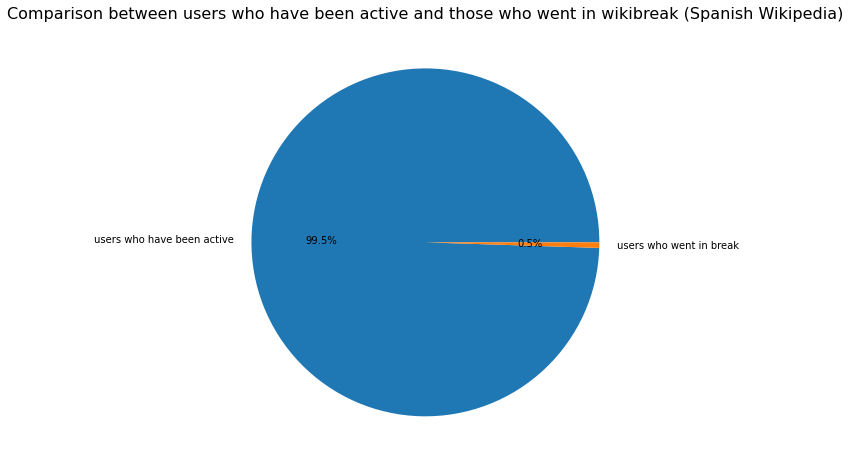

In [211]:
plt.figure(figsize=(16,8))
plt.pie(percentage_compared_with_activity['total'], labels=percentage_compared_with_activity['label'], autopct='%.1f%%')
plt.title('Comparison between users who have been active and those who went in wikibreak (Spanish Wikipedia)', fontsize=16)
plt.show()

# $ grafico: amount of active users

## Users still in break over the total amount of users who have been active

In [212]:
active_users_amount['tot']

421632

In [213]:
row_total = {'total': active_users_amount['tot'] - users_still_in_breaks.shape[0], 'label': 'users who have been active'}
row_break = {'total': users_still_in_breaks.shape[0], 'label': 'users currently in break'}
rows = [row_total, row_break]
percentage_compared_with_activity_still_in_break = pd.DataFrame(rows).reset_index(drop=True)
percentage_compared_with_activity_still_in_break

,total,label
0,420521,users who have been active
1,1111,users currently in break


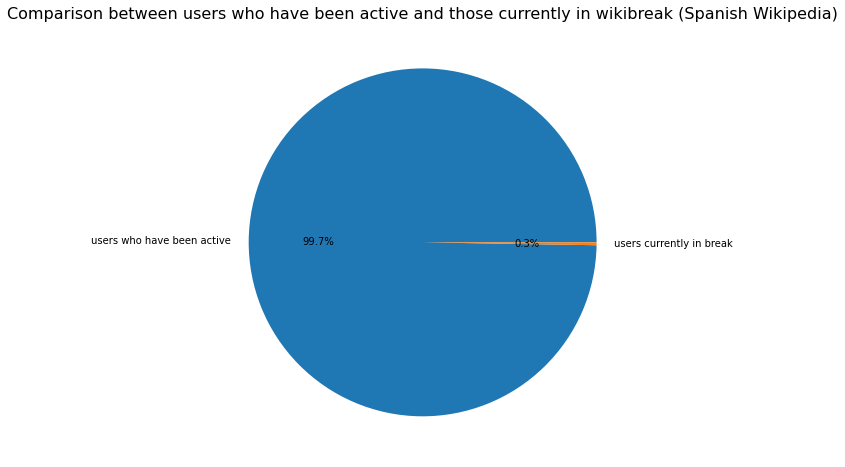

In [214]:
plt.figure(figsize=(16,8))
plt.pie(percentage_compared_with_activity_still_in_break['total'], labels=percentage_compared_with_activity_still_in_break['label'], autopct='%.1f%%')
plt.title('Comparison between users who have been active and those currently in wikibreak (Spanish Wikipedia)', fontsize=16)
plt.show()

## Current wikibreaks templates

In [215]:
wikibreaks_still_in_breaks = still_in_breaks
wikibreaks_still_in_breaks['count'] = 1
wikibreaks_still_in_breaks = wikibreaks_still_in_breaks[['wikibreak', 'count']].groupby('wikibreak').count().reset_index().sort_values(['count'], ascending=False)
wikibreaks_still_in_breaks.head()

,wikibreak,count
6,usuario retirado,1063
4,usuario ausente,85
9,wikivacaciones,53
2,retirado,39
5,usuario fallecido,27


In [216]:
wikibreaks_still_in_breaks.shape

(10, 2)

In [217]:
wikibreaks_still_in_breaks.describe()

,count
count,10.000000
mean,128.400000
std,329.563078
min,1.000000
25%,1.750000
50%,18.500000
75%,49.500000
max,1063.000000


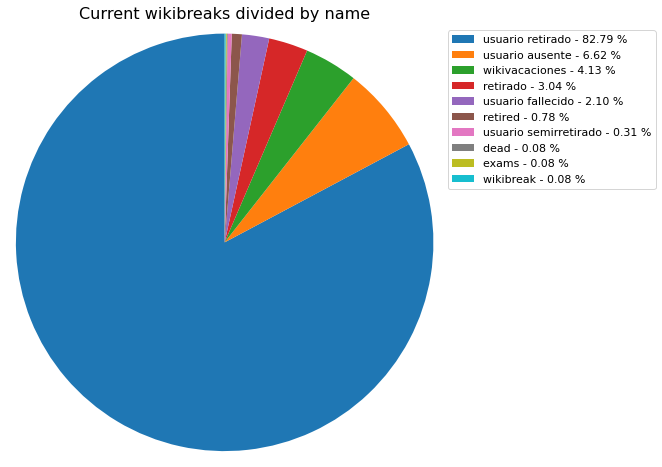

In [218]:
plt.figure(figsize=(16, 8))
plt.title('Current wikibreaks divided by name', fontsize=16)

wikibreaks = wikibreaks_still_in_breaks['wikibreak']
values = wikibreaks_still_in_breaks['count']
percentage = 100.*values/values.sum()

patches, texts = plt.pie(values, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(wikibreaks, percentage)]
patches, labels, dummy =  zip(*sorted(zip(patches, labels, values), key=lambda x: x[2], reverse=True))

plt.legend(patches, labels, bbox_to_anchor=(1, 1), fontsize=11)
plt.show()

## Current subcategories

In [219]:
subcategories_still_in_breaks = still_in_breaks
subcategories_still_in_breaks['count'] = 1
subcategories_still_in_breaks = subcategories_still_in_breaks[['subcategory', 'count']].groupby('subcategory').count().reset_index().sort_values(['count'], ascending=False)
subcategories_still_in_breaks.head()

,subcategory,count
2,retired,1112
5,wikibreak,86
4,vacation,53
0,deceased wikipedian,28
3,semi-retired,4


In [220]:
subcategories_still_in_breaks.shape

(6, 2)

In [221]:
subcategories_still_in_breaks.describe()

,count
count,6.000000
mean,214.000000
std,441.083666
min,1.000000
25%,10.000000
50%,40.500000
75%,77.750000
max,1112.000000


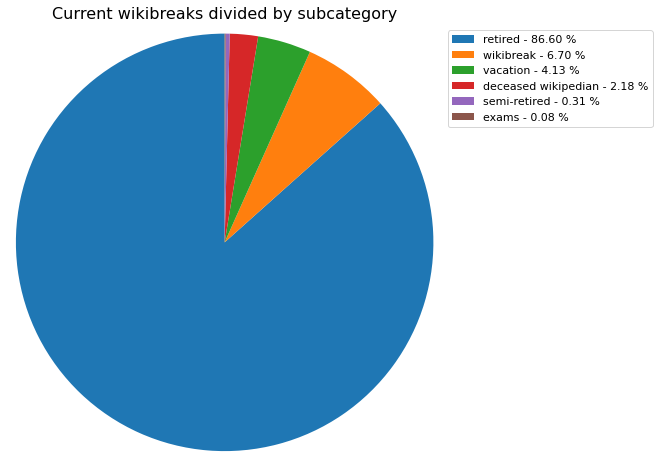

In [222]:
plt.figure(figsize=(16, 8))
plt.title('Current wikibreaks divided by subcategory', fontsize=16)

wikibreaks = subcategories_still_in_breaks['subcategory']
values = subcategories_still_in_breaks['count']
percentage = 100.*values/values.sum()

patches, texts = plt.pie(values, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(wikibreaks, percentage)]
patches, labels, dummy =  zip(*sorted(zip(patches, labels, values), key=lambda x: x[2], reverse=True))

plt.legend(patches, labels, bbox_to_anchor=(1, 1), fontsize=11)
plt.show()

## Current wikibreaks

In [223]:
categories_still_in_breaks = still_in_breaks[['categories', 'name']]
categories_still_in_breaks_refactored = list()
for i, row in categories_still_in_breaks.iterrows():
    for el in row['categories']:
        new_row = row
        new_row = new_row.drop('categories')
        new_row['category'] = el
        categories_still_in_breaks_refactored.append(new_row)
categories_still_in_breaks_refactored = pd.DataFrame(categories_still_in_breaks_refactored).reset_index(drop=True)
# categories_still_in_breaks_refactored.head()

In [224]:
categories_still_in_breaks_refactored = categories_still_in_breaks_refactored
categories_still_in_breaks_refactored['count'] = 1
categories_still_in_breaks_refactored = categories_still_in_breaks_refactored[['category', 'count']].groupby('category').count().reset_index().sort_values(['count'], ascending=False)
categories_still_in_breaks_refactored.head()

,category,count
1,other,1144
0,break,140


In [225]:
categories_still_in_breaks_refactored.shape

(2, 2)

In [226]:
categories_still_in_breaks_refactored.describe()

,count
count,2.000000
mean,642.000000
std,709.935208
min,140.000000
25%,391.000000
50%,642.000000
75%,893.000000
max,1144.000000


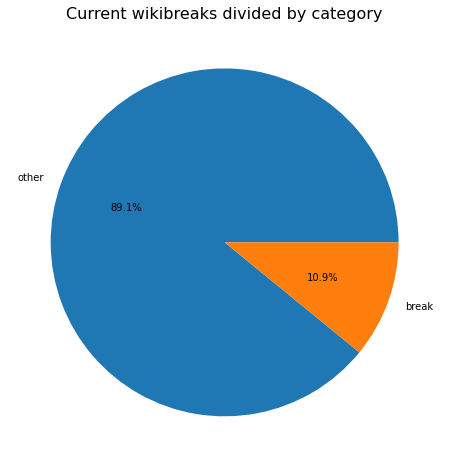

In [227]:
plt.figure(figsize=(16,8))
plt.pie(categories_still_in_breaks_refactored['count'], labels=categories_still_in_breaks_refactored['category'], autopct='%.1f%%')
plt.title('Current wikibreaks divided by category', fontsize=16)
plt.show()

# Line graph to see the flow of wikibreaks in Spanish Wikipedia

In [228]:
# unique wikibreaks
wikibreaks = spanish_wikibreaks_refactored_df['wikibreak'].unique()
wikibreaks

array(['usuario retirado', 'wikivacaciones', 'usuario ausente',
       'usuario fallecido', 'retirado', 'usuario semirretirado',
       'retired', 'dead', 'exams', 'wikibreak', 'atschool'], dtype=object)

In [229]:
# unique subcategories
subcategories = spanish_wikibreaks_refactored_df['subcategory'].unique()
subcategories

array(['retired', 'vacation', 'wikibreak', 'deceased wikipedian',
       'semi-retired', 'exams', 'at school'], dtype=object)

In [230]:
# unique categories
categories = list()
for i, row in spanish_wikibreaks_refactored_df[['categories', 'name']].iterrows():
    for el in row['categories']:
        new_row = row
        new_row = new_row.drop('categories')
        new_row['category'] = el
        categories.append(new_row)
categories = pd.DataFrame(categories).reset_index(drop=True)
categories = categories['category'].unique()
categories

array(['other', 'break'], dtype=object)

In [231]:
# date to start from
start_from = spanish_wikibreaks_refactored_df['from_date'].min()
start_from

Timestamp('2005-08-20 08:25:35+0000', tz='UTC')

In [232]:
last_date = datetime.now().replace(tzinfo=pytz.UTC)
last_date

datetime.datetime(2021, 5, 6, 15, 19, 26, 287306, tzinfo=<UTC>)

In [233]:
breaks_history = list()
breaks_history_per_month = list()

spanish_wikibreaks_simple_date = spanish_wikibreaks_refactored_df
spanish_wikibreaks_simple_date['from_date'] = spanish_wikibreaks_simple_date['from_date'].dt.normalize()
spanish_wikibreaks_simple_date['from_date'] = spanish_wikibreaks_simple_date['from_date'].apply(lambda r: r.replace(day=1))
spanish_wikibreaks_simple_date['to_date'] = spanish_wikibreaks_simple_date['to_date'].dt.normalize()
spanish_wikibreaks_simple_date['to_date'] = spanish_wikibreaks_simple_date['to_date'].apply(lambda r: r.replace(day=1))
# iterating over years
for year in range(start_from.year, last_date.year + 1):
    if year == start_from.year: # first year
        start_month = start_from.month
    else:
        start_month = 1
    
    if year == last_date.year: # last year
        last_month = last_date.month
    else:
        last_month = 12
    
    for month in range(start_month, last_month + 1):
        # specified in the given month
        mask = year == spanish_wikibreaks_simple_date['from_date'].dt.year
        mask2 = spanish_wikibreaks_simple_date['from_date'].dt.month == month
        mask = mask & mask2
        this_month_df = spanish_wikibreaks_simple_date[mask]
        for j, elem in this_month_df.iterrows():
            el = dict()
            el['year'] = year
            el['month'] = month
            el['subcategory'] = elem['subcategory']
            el['wikibreak'] = elem['wikibreak']
            el['categories'] = elem['categories']
            breaks_history_per_month.append(el)
            
        mask = (spanish_wikibreaks_simple_date['from_date'] <= datetime(year, month, 1).replace(tzinfo=pytz.UTC))
        mask_2 = (pd.isnull(spanish_wikibreaks_simple_date['to_date'])) | (spanish_wikibreaks_simple_date['to_date'] >= datetime(year, month, 1).replace(tzinfo=pytz.UTC)) 
        mask = mask & mask_2
        filtered = spanish_wikibreaks_simple_date[mask]
        for j, elem in filtered.iterrows():
            el = dict()
            el['year'] = year
            el['month'] = month
            el['subcategory'] = elem['subcategory']
            el['wikibreak'] = elem['wikibreak']
            el['categories'] = elem['categories']
            breaks_history.append(el)

breaks_history = pd.DataFrame(breaks_history).reset_index(drop=True)
breaks_history_per_month = pd.DataFrame(breaks_history_per_month).reset_index(drop=True)

In [234]:
breaks_history.head()

,year,month,subcategory,wikibreak,categories
0,2005,8,vacation,wikivacaciones,[break]
1,2005,8,vacation,wikivacaciones,[break]
2,2005,11,vacation,wikivacaciones,[break]
3,2005,12,vacation,wikivacaciones,[break]
4,2005,12,vacation,wikivacaciones,[break]


In [235]:
breaks_history.shape

(155621, 5)

In [236]:
breaks_history.describe()

,year,month
count,155621.000000,155621.000000
mean,2015.199716,6.461917
std,3.566531,3.461334
min,2005.000000,1.000000
25%,2012.000000,3.000000
50%,2015.000000,6.000000
75%,2018.000000,9.000000
max,2021.000000,12.000000


In [237]:
breaks_history_subcategory_count = breaks_history
breaks_history_subcategory_count['count'] = 1
breaks_history_subcategory_count = breaks_history_subcategory_count[['year', 'month', 'subcategory', 'count']].groupby(['year', 'month',  'subcategory']).count().reset_index().sort_values(['year', 'month'], ascending=True)
breaks_history_subcategory_count['date'] = pd.to_datetime(breaks_history_subcategory_count[['year','month']].assign(day=1)).dt.date
breaks_history_subcategory_count.head()

,year,month,subcategory,count,date
0,2005,8,vacation,2,2005-08-01
1,2005,11,vacation,1,2005-11-01
2,2005,12,vacation,6,2005-12-01
3,2006,1,vacation,3,2006-01-01
4,2006,3,wikibreak,5,2006-03-01


In [238]:
breaks_history_subcategory_count.tail()

,year,month,subcategory,count,date
748,2021,5,exams,1,2021-05-01
749,2021,5,retired,1112,2021-05-01
750,2021,5,semi-retired,4,2021-05-01
751,2021,5,vacation,53,2021-05-01
752,2021,5,wikibreak,86,2021-05-01


In [239]:
breaks_history_subcategory_count.describe()

,year,month,count
count,753.000000,753.000000,753.000000
mean,2014.484728,6.451527,206.667995
std,4.196325,3.457277,355.801237
min,2005.000000,1.000000,1.000000
25%,2011.000000,3.000000,10.000000
50%,2015.000000,6.000000,43.000000
75%,2018.000000,9.000000,77.000000
max,2021.000000,12.000000,1115.000000


#### Clean counter

In [240]:
breaks_history_subcategory_count_cleaned = list()
for date in breaks_history_subcategory_count['date'].unique():
    for subcat in subcategories:
        elem = breaks_history_subcategory_count.loc[(breaks_history_subcategory_count['date'] == date) & (breaks_history_subcategory_count['subcategory'] == subcat)]
        if elem.empty:
            breaks_history_subcategory_count_cleaned.append([date.year, date.month, subcat, 0, date])
        else:
            breaks_history_subcategory_count_cleaned.append(np.array(elem)[0])
breaks_history_subcategory_count_cleaned = pd.DataFrame(breaks_history_subcategory_count_cleaned).reset_index(drop=True).set_axis(['year', 'month', 'subcategory', 'count', 'date'], axis=1)
breaks_history_subcategory_count_cleaned.head()

,year,month,subcategory,count,date
0,2005,8,retired,0,2005-08-01
1,2005,8,vacation,2,2005-08-01
2,2005,8,wikibreak,0,2005-08-01
3,2005,8,deceased wikipedian,0,2005-08-01
4,2005,8,semi-retired,0,2005-08-01


## Subcategories during Spanish Wikipedia history

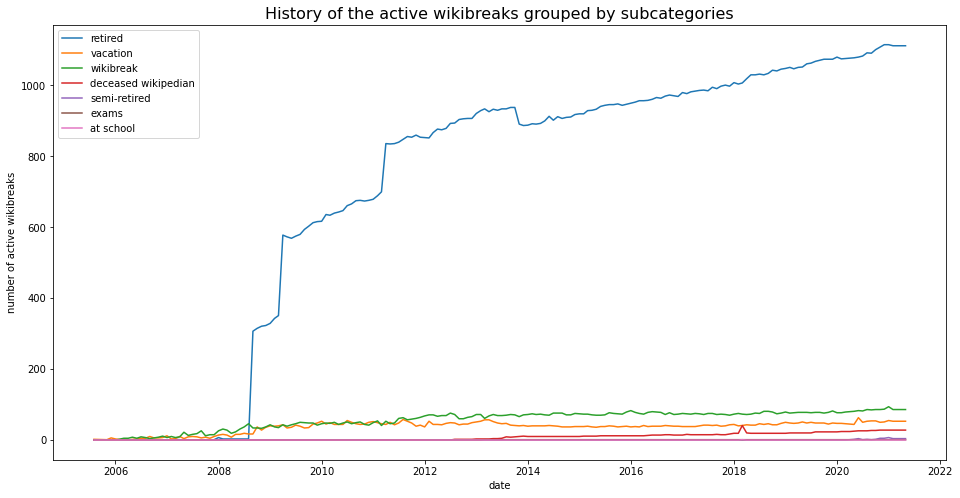

In [241]:
plt.figure(figsize=(16,8))
for subcategory in breaks_history_subcategory_count_cleaned['subcategory'].unique():
    subcat = breaks_history_subcategory_count_cleaned[breaks_history_subcategory_count_cleaned['subcategory'] == subcategory]
    plt.plot(subcat['date'], subcat['count'], label = subcategory)
plt.legend()
plt.title('History of the active wikibreaks grouped by subcategories', fontsize=16)
plt.ylabel('number of active wikibreaks')
plt.xlabel('date')
plt.show()

In [242]:
fig = px.line(breaks_history_subcategory_count_cleaned, x='date', y='count', color='subcategory', title='History of the active wikibreaks grouped by subcategories')
fig.show()

The same but with the names of the pauses

In [243]:
breaks_history_wikibreak_count = breaks_history
breaks_history_wikibreak_count['count'] = 1
breaks_history_wikibreak_count = breaks_history_wikibreak_count[['year', 'month', 'wikibreak', 'count']].groupby(['year', 'month', 'wikibreak']).count().reset_index().sort_values(['year', 'month'], ascending=True)
breaks_history_wikibreak_count['date'] = pd.to_datetime(breaks_history_wikibreak_count[['year','month']].assign(day=1)).dt.date
breaks_history_wikibreak_count.head()

,year,month,wikibreak,count,date
0,2005,8,wikivacaciones,2,2005-08-01
1,2005,11,wikivacaciones,1,2005-11-01
2,2005,12,wikivacaciones,6,2005-12-01
3,2006,1,wikivacaciones,3,2006-01-01
4,2006,3,usuario ausente,5,2006-03-01


In [244]:
breaks_history_wikibreak_count.tail()

,year,month,wikibreak,count,date
1265,2021,5,usuario fallecido,27,2021-05-01
1266,2021,5,usuario retirado,1063,2021-05-01
1267,2021,5,usuario semirretirado,4,2021-05-01
1268,2021,5,wikibreak,1,2021-05-01
1269,2021,5,wikivacaciones,53,2021-05-01


In [245]:
breaks_history_wikibreak_count.describe()

,year,month,count
count,1270.000000,1270.000000,1270.000000
mean,2014.761417,6.438583,122.536220
std,3.990603,3.454615,284.752065
min,2005.000000,1.000000,1.000000
25%,2012.000000,3.000000,1.000000
50%,2015.000000,6.000000,10.000000
75%,2018.000000,9.000000,48.000000
max,2021.000000,12.000000,1065.000000


#### Clean counter

In [246]:
breaks_history_wikibreak_count_cleaned = list()
for date in breaks_history_wikibreak_count['date'].unique():
    for wb in wikibreaks:
        elem = breaks_history_wikibreak_count.loc[(breaks_history_wikibreak_count['date'] == date) & (breaks_history_wikibreak_count['wikibreak'] == wb)]
        if elem.empty:
            breaks_history_wikibreak_count_cleaned.append([date.year, date.month, wb, 0, date])
        else:
            breaks_history_wikibreak_count_cleaned.append(np.array(elem)[0])
breaks_history_wikibreak_count_cleaned = pd.DataFrame(breaks_history_wikibreak_count_cleaned).reset_index(drop=True).set_axis(['year', 'month', 'wikibreak', 'count', 'date'], axis=1)
breaks_history_wikibreak_count_cleaned.head()

,year,month,wikibreak,count,date
0,2005,8,usuario retirado,0,2005-08-01
1,2005,8,wikivacaciones,2,2005-08-01
2,2005,8,usuario ausente,0,2005-08-01
3,2005,8,usuario fallecido,0,2005-08-01
4,2005,8,retirado,0,2005-08-01


## Wikibreaks during Spanish Wikipedia history

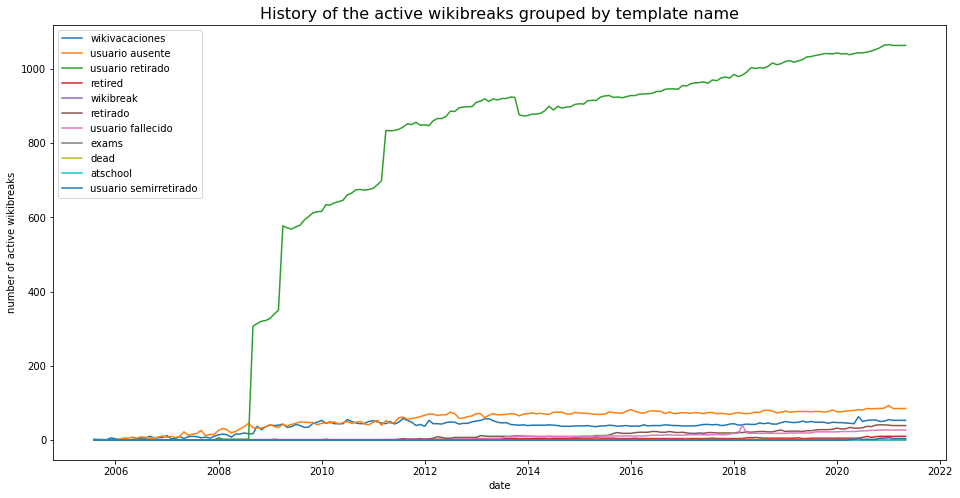

In [247]:
plt.figure(figsize=(16,8))
for wikibreak in breaks_history_wikibreak_count['wikibreak'].unique():
    wb = breaks_history_wikibreak_count_cleaned[breaks_history_wikibreak_count_cleaned['wikibreak'] == wikibreak]
    plt.plot(wb['date'], wb['count'], label = wikibreak)
plt.legend()
plt.title('History of the active wikibreaks grouped by template name', fontsize=16)
plt.ylabel('number of active wikibreaks')
plt.xlabel('date')
plt.show()

In [248]:
fig = px.line(breaks_history_wikibreak_count_cleaned, x='date', y='count', color='wikibreak', title='History of the active wikibreaks grouped by template name')
fig.show()

In [249]:
breaks_history_category_count = breaks_history[['year', 'month', 'subcategory', 'categories']]
breaks_history_category_count.head()

,year,month,subcategory,categories
0,2005,8,vacation,[break]
1,2005,8,vacation,[break]
2,2005,11,vacation,[break]
3,2005,12,vacation,[break]
4,2005,12,vacation,[break]


In [250]:
breaks_history_category_count_refactored = list()
for i, row in breaks_history_category_count.iterrows():
    for el in row['categories']:
        new_row = row
        new_row = new_row.drop('categories')
        new_row['category'] = el
        breaks_history_category_count_refactored.append(new_row)
breaks_history_category_count_refactored = pd.DataFrame(breaks_history_category_count_refactored).reset_index(drop=True)
breaks_history_category_count_refactored.head()

,year,month,subcategory,category
0,2005,8,vacation,break
1,2005,8,vacation,break
2,2005,11,vacation,break
3,2005,12,vacation,break
4,2005,12,vacation,break


In [251]:
breaks_history_category_count_refactored = breaks_history_category_count_refactored
breaks_history_category_count_refactored['count'] = 1
breaks_history_category_count_refactored = breaks_history_category_count_refactored[['year', 'month', 'category', 'count']].groupby(['year', 'month', 'category']).count().reset_index().sort_values(['year', 'month'], ascending=True)
breaks_history_category_count_refactored['date'] = pd.to_datetime(breaks_history_category_count_refactored[['year','month']].assign(day=1)).dt.date
breaks_history_category_count_refactored.head()

,year,month,category,count,date
0,2005,8,break,2,2005-08-01
1,2005,11,break,1,2005-11-01
2,2005,12,break,6,2005-12-01
3,2006,1,break,3,2006-01-01
4,2006,3,break,5,2006-03-01


In [252]:
breaks_history_category_count_refactored.tail()

,year,month,category,count,date
347,2021,3,other,1144,2021-03-01
348,2021,4,break,140,2021-04-01
349,2021,4,other,1144,2021-04-01
350,2021,5,break,140,2021-05-01
351,2021,5,other,1144,2021-05-01


In [253]:
breaks_history_category_count_refactored.shape

(352, 5)

In [254]:
breaks_history_wikibreak_count.describe()

,year,month,count
count,1270.000000,1270.000000,1270.000000
mean,2014.761417,6.438583,122.536220
std,3.990603,3.454615,284.752065
min,2005.000000,1.000000,1.000000
25%,2012.000000,3.000000,1.000000
50%,2015.000000,6.000000,10.000000
75%,2018.000000,9.000000,48.000000
max,2021.000000,12.000000,1065.000000


#### Clean counter

In [255]:
breaks_history_category_count_refactored_cleaned = list()
for date in breaks_history_category_count_refactored['date'].unique():
    for cat in categories:
        elem = breaks_history_category_count_refactored.loc[(breaks_history_category_count_refactored['date'] == date) & (breaks_history_category_count_refactored['category'] == cat)]
        if elem.empty:
            breaks_history_category_count_refactored_cleaned.append([date.year, date.month, cat, 0, date])
        else:
            breaks_history_category_count_refactored_cleaned.append(np.array(elem)[0])
breaks_history_category_count_refactored_cleaned = pd.DataFrame(breaks_history_category_count_refactored_cleaned).reset_index(drop=True).set_axis(['year', 'month', 'category', 'count', 'date'], axis=1)
breaks_history_category_count_refactored_cleaned.head()

,year,month,category,count,date
0,2005,8,other,0,2005-08-01
1,2005,8,break,2,2005-08-01
2,2005,11,other,0,2005-11-01
3,2005,11,break,1,2005-11-01
4,2005,12,other,0,2005-12-01


## Categories during Spanish Wikipedia history

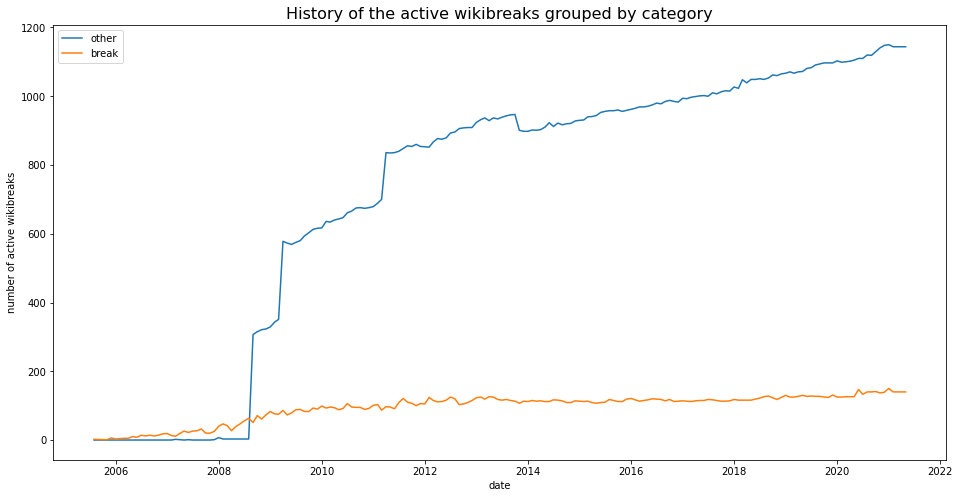

In [256]:
plt.figure(figsize=(16,8))
for cat in breaks_history_category_count_refactored_cleaned['category'].unique():
    category = breaks_history_category_count_refactored_cleaned[breaks_history_category_count_refactored_cleaned['category'] == cat]
    plt.plot(category['date'], category['count'], label = cat)
plt.legend()
plt.title('History of the active wikibreaks grouped by category', fontsize=16)
plt.ylabel('number of active wikibreaks')
plt.xlabel('date')
plt.show()

In [257]:
fig = px.line(breaks_history_category_count_refactored_cleaned, x='date', y='count', color='category', title='History of the active wikibreaks grouped by category')
fig.show()

## Line graphs normalized with respect to the active users of a specific month (subcategories)

In [258]:
breaks_history_subcategory_count_per_month = breaks_history_per_month
breaks_history_subcategory_count_per_month['count'] = 1
breaks_history_subcategory_count_per_month = breaks_history_subcategory_count_per_month[['year', 'month', 'subcategory', 'count']].groupby(['year', 'month',  'subcategory']).count().reset_index().sort_values(['year', 'month'], ascending=True)
breaks_history_subcategory_count_per_month['date'] = pd.to_datetime(breaks_history_subcategory_count_per_month[['year','month']].assign(day=1)).dt.date
breaks_history_subcategory_count_per_month.head()

,year,month,subcategory,count,date
0,2005,8,vacation,2,2005-08-01
1,2005,11,vacation,1,2005-11-01
2,2005,12,vacation,5,2005-12-01
3,2006,1,vacation,1,2006-01-01
4,2006,3,wikibreak,5,2006-03-01


In [259]:
breaks_history_subcategory_count_per_month.head()

,year,month,subcategory,count,date
0,2005,8,vacation,2,2005-08-01
1,2005,11,vacation,1,2005-11-01
2,2005,12,vacation,5,2005-12-01
3,2006,1,vacation,1,2006-01-01
4,2006,3,wikibreak,5,2006-03-01


Data cleaning

In [260]:
breaks_history_subcategory_count_per_month_refactored_cleaned = list()
for date in breaks_history_subcategory_count_per_month['date'].unique():
    for sub in subcategories:
        elem = breaks_history_subcategory_count_per_month.loc[(breaks_history_subcategory_count_per_month['date'] == date) & (breaks_history_subcategory_count_per_month['subcategory'] == sub)]
        if elem.empty:
            breaks_history_subcategory_count_per_month_refactored_cleaned.append([date.year, date.month, sub, 0, date])
        else:
            # divide the count by the number of active users in that month
            if np.array(elem)[0][1] < 10:
                month = '0{}'.format(np.array(elem)[0][1])
            else:
                month = '{}'.format(np.array(elem)[0][1])
            year = np.array(elem)[0][0]
            try:
                active_users = active_users_amount['per_mese']['{}_{}'.format(year, month)]
            except:
                active_users = 1 # no users were active
            prev = np.array(elem)[0][3]
            elem_refactored = elem.copy()
            elem_refactored['count'] = elem_refactored['count'].div(active_users) * 100
            breaks_history_subcategory_count_per_month_refactored_cleaned.append(np.array(elem_refactored)[0])
breaks_history_subcategory_count_per_month_refactored_cleaned = pd.DataFrame(breaks_history_subcategory_count_per_month_refactored_cleaned).reset_index(drop=True).set_axis(['year', 'month', 'subcategory', 'count', 'date'], axis=1)
breaks_history_subcategory_count_per_month_refactored_cleaned.head()

,year,month,subcategory,count,date
0,2005,8,retired,0.000000,2005-08-01
1,2005,8,vacation,0.186047,2005-08-01
2,2005,8,wikibreak,0.000000,2005-08-01
3,2005,8,deceased wikipedian,0.000000,2005-08-01
4,2005,8,semi-retired,0.000000,2005-08-01


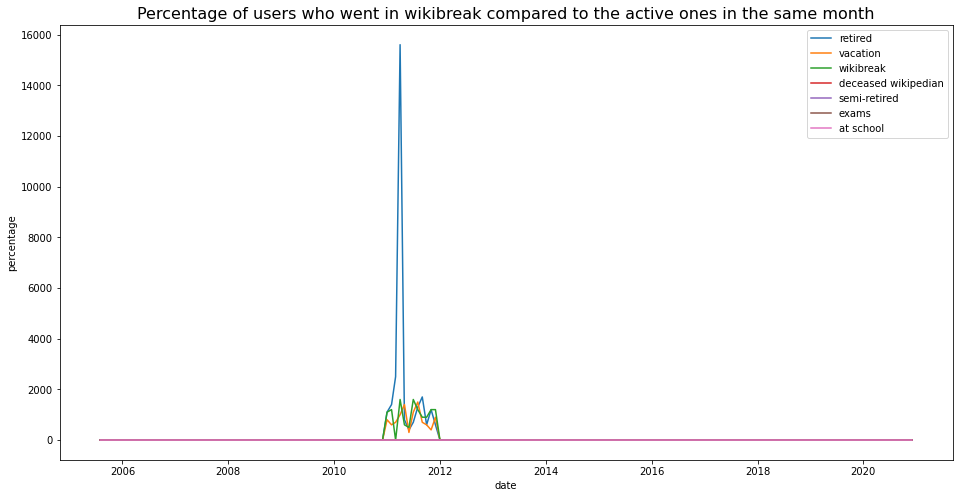

In [261]:
plt.figure(figsize=(16,8))
for sub in breaks_history_subcategory_count_per_month_refactored_cleaned['subcategory'].unique():
    subcategory = breaks_history_subcategory_count_per_month_refactored_cleaned[breaks_history_subcategory_count_per_month_refactored_cleaned['subcategory'] == sub]
    # remove the last month because it is not completed
    subcategory = subcategory[:-1]
    plt.plot(subcategory['date'], subcategory['count'], label = sub)
plt.legend()
plt.title('Percentage of users who went in wikibreak compared to the active ones in the same month', fontsize=16)
plt.ylabel('percentage')
plt.xlabel('date')
plt.show()

## Line graphs normalized with respect to the active users of a specific month (categories)

In [262]:
breaks_history_category_count_per_month = list()
for i, row in breaks_history_per_month.iterrows():
    for el in row['categories']:
        new_row = row
        new_row = new_row.drop('categories')
        new_row['category'] = el
        breaks_history_category_count_per_month.append(new_row)
breaks_history_category_count_per_month = pd.DataFrame(breaks_history_category_count_per_month).reset_index(drop=True)
breaks_history_category_count_per_month.head()

,year,month,subcategory,wikibreak,count,category
0,2005,8,vacation,wikivacaciones,1,break
1,2005,8,vacation,wikivacaciones,1,break
2,2005,11,vacation,wikivacaciones,1,break
3,2005,12,vacation,wikivacaciones,1,break
4,2005,12,vacation,wikivacaciones,1,break


In [263]:
breaks_history_category_count_per_month_refactored = breaks_history_category_count_per_month
breaks_history_category_count_per_month_refactored['count'] = 1
breaks_history_category_count_per_month_refactored = breaks_history_category_count_per_month_refactored[['year', 'month', 'category', 'count']].groupby(['year', 'month', 'category']).count().reset_index().sort_values(['year', 'month'], ascending=True)
breaks_history_category_count_per_month_refactored['date'] = pd.to_datetime(breaks_history_category_count_per_month_refactored[['year','month']].assign(day=1)).dt.date
breaks_history_category_count_per_month_refactored.head()

,year,month,category,count,date
0,2005,8,break,2,2005-08-01
1,2005,11,break,1,2005-11-01
2,2005,12,break,5,2005-12-01
3,2006,1,break,1,2006-01-01
4,2006,3,break,5,2006-03-01


Data cleaning

In [264]:
breaks_history_category_count_per_month_refactored_cleaned = list()
for date in breaks_history_category_count_per_month_refactored['date'].unique():
    for cat in categories:
        elem = breaks_history_category_count_per_month_refactored.loc[(breaks_history_category_count_per_month_refactored['date'] == date) & (breaks_history_category_count_per_month['category'] == cat)]
        if elem.empty:
            breaks_history_category_count_per_month_refactored_cleaned.append([date.year, date.month, cat, 0, date])
        else:
            # divide the count by the number of active users in that month
            if np.array(elem)[0][1] < 10:
                month = '0{}'.format(np.array(elem)[0][1])
            else:
                month = '{}'.format(np.array(elem)[0][1])
            year = np.array(elem)[0][0]
            try:
                active_users = active_users_amount['per_mese']['{}_{}'.format(year, month)]
            except:
                active_users = 1 # no users were active
            prev = np.array(elem)[0][3]
            elem_refactored = elem.copy()
            elem_refactored['count'] = elem_refactored['count'].div(active_users) * 100
            breaks_history_category_count_per_month_refactored_cleaned.append(np.array(elem_refactored)[0])
breaks_history_category_count_per_month_refactored_cleaned = pd.DataFrame(breaks_history_category_count_per_month_refactored_cleaned).reset_index(drop=True).set_axis(['year', 'month', 'category', 'count', 'date'], axis=1)
breaks_history_category_count_per_month_refactored_cleaned.head()

,year,month,category,count,date
0,2005,8,other,0.000000,2005-08-01
1,2005,8,break,0.186047,2005-08-01
2,2005,11,other,0.000000,2005-11-01
3,2005,11,break,0.081633,2005-11-01
4,2005,12,other,0.000000,2005-12-01


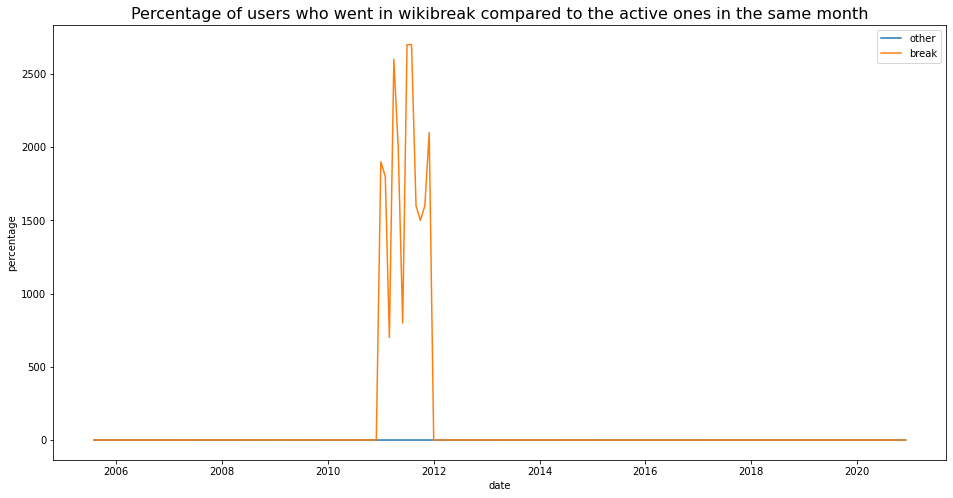

In [265]:
plt.figure(figsize=(16,8))
for cat in breaks_history_category_count_per_month_refactored_cleaned['category'].unique():
    category = breaks_history_category_count_per_month_refactored_cleaned[breaks_history_category_count_per_month_refactored_cleaned['category'] == cat]
    # remove the last month because it is not completed
    category = category[:-1]
    plt.plot(category['date'], category['count'], label = cat)
plt.legend()
plt.title('Percentage of users who went in wikibreak compared to the active ones in the same month', fontsize=16)
plt.ylabel('percentage')
plt.xlabel('date')
plt.show()

## Total number of times a certain template was used

In [266]:
# spanish_wikibreaks_refactored_df.head()

In [267]:
wikibreak_used = spanish_wikibreaks_refactored_df
wikibreak_used['count'] = 1
wikibreak_used = wikibreak_used[['wikibreak', 'count']].groupby('wikibreak').count().reset_index().sort_values(['count'], ascending=False)
wikibreak_used.head()

,wikibreak,count
7,usuario retirado,1856
5,usuario ausente,1081
10,wikivacaciones,786
3,retirado,105
6,usuario fallecido,58


In [268]:
wikibreak_used.shape

(11, 2)

In [269]:
wikibreak_used.describe()

,count
count,11.000000
mean,357.363636
std,619.804045
min,1.000000
25%,2.000000
50%,27.000000
75%,445.500000
max,1856.000000


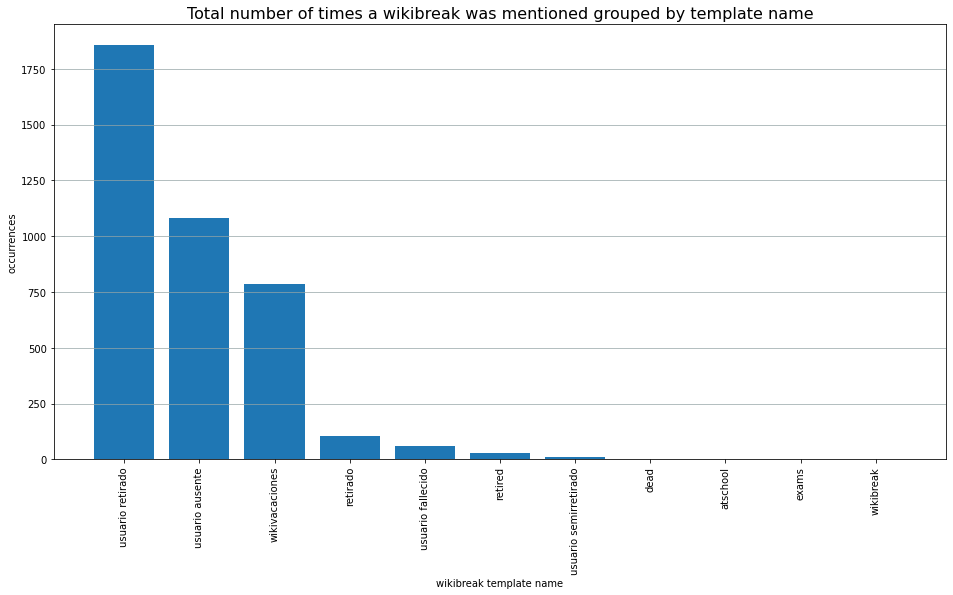

In [270]:
plt.figure(figsize=(16,8))
plt.bar(wikibreak_used['wikibreak'], wikibreak_used['count'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation='vertical')
plt.title('Total number of times a wikibreak was mentioned grouped by template name', fontsize=16)
plt.ylabel('occurrences')
plt.xlabel('wikibreak template name')
plt.show()

## Number of time a certain subcategory was mentioned

In [271]:
subcategory_used = spanish_wikibreaks_refactored_df
subcategory_used['count'] = 1
subcategory_used = subcategory_used[['subcategory', 'count']].groupby('subcategory').count().reset_index().sort_values(['count'], ascending=False)
subcategory_used.head()

,subcategory,count
3,retired,1988
6,wikibreak,1082
5,vacation,786
1,deceased wikipedian,61
4,semi-retired,12


In [272]:
subcategory_used.shape

(7, 2)

In [273]:
subcategory_used.describe()

,count
count,7.000000
mean,561.571429
std,767.788351
min,1.000000
25%,6.500000
50%,61.000000
75%,934.000000
max,1988.000000


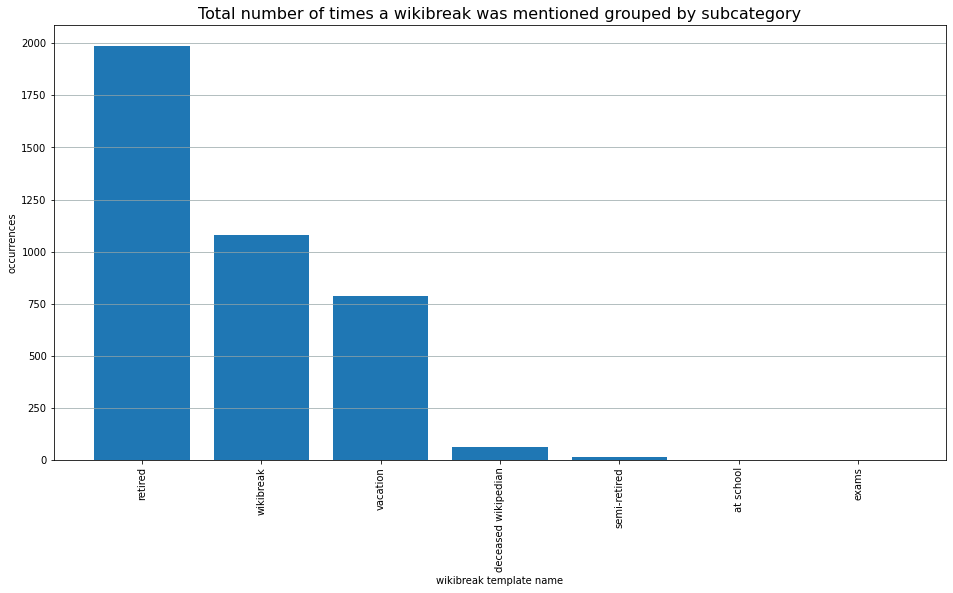

In [274]:
plt.figure(figsize=(16,8))
plt.bar(subcategory_used['subcategory'], subcategory_used['count'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.title('Total number of times a wikibreak was mentioned grouped by subcategory', fontsize=16)
plt.xticks(rotation='vertical')
plt.ylabel('occurrences')
plt.xlabel('wikibreak template name')
plt.show()

## Number of time a certain category was mentioned

In [275]:
category_used = still_in_breaks[['categories', 'name']]
category_used = list()
for i, row in spanish_wikibreaks_refactored_df.iterrows():
    for el in row['categories']:
        new_row = row
        new_row = new_row.drop('categories')
        new_row['category'] = el
        category_used.append(new_row)
category_used = pd.DataFrame(category_used).reset_index(drop=True)
# category_used.head()

In [276]:
category_used['count'] = 1
category_used = category_used[['category', 'count']].groupby('category').count().reset_index().sort_values(['count'], ascending=False)
category_used.head()

,category,count
1,other,2061
0,break,1870


In [277]:
category_used.shape

(2, 2)

In [278]:
category_used.describe()

,count
count,2.000000
mean,1965.500000
std,135.057395
min,1870.000000
25%,1917.750000
50%,1965.500000
75%,2013.250000
max,2061.000000


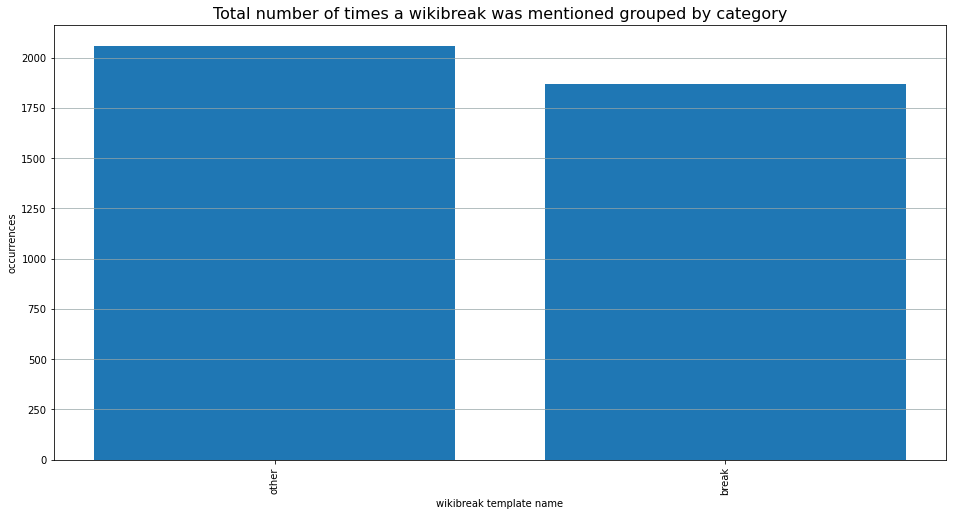

In [279]:
plt.figure(figsize=(16,8))
plt.bar(category_used['category'], category_used['count'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation='vertical')
plt.title('Total number of times a wikibreak was mentioned grouped by category', fontsize=16)
plt.ylabel('occurrences')
plt.xlabel('wikibreak template name')
plt.show()

 ## Number of users who went multiples times in wikibreak (using the same template)

In [280]:
# spanish_wikibreaks_refactored_df.head()

In [281]:
users_multiple_times_wikibreak = spanish_wikibreaks_refactored_df
users_multiple_times_wikibreak['count'] = 1
# users_multiple_times_wikibreak.head()

In [282]:
users_multiple_times_wikibreak = users_multiple_times_wikibreak[['name', 'wikibreak', 'count']].groupby(['name', 'wikibreak']).count().reset_index()
# users_multiple_times_wikibreak.head()

In [283]:
total_users = spanish_wikibreaks_df.shape[0]
total_users

2151

In [284]:
users_multiple_times_wikibreak = users_multiple_times_wikibreak.loc[users_multiple_times_wikibreak['count'] >= 2]
# users_multiple_times_wikibreak.head()

In [285]:
total_users_multiple = users_multiple_times_wikibreak.shape[0]
total_users_multiple

723

In [286]:
row_total = {'total': spanish_wikibreaks_df.shape[0] - total_users_multiple, 'label': 'single time'}
row_multiple = {'total': total_users_multiple, 'label': 'multiple times'}
rows = [row_total, row_multiple]
percentage_multiple_times = pd.DataFrame(rows).reset_index(drop=True)
percentage_multiple_times

,total,label
0,1428,single time
1,723,multiple times


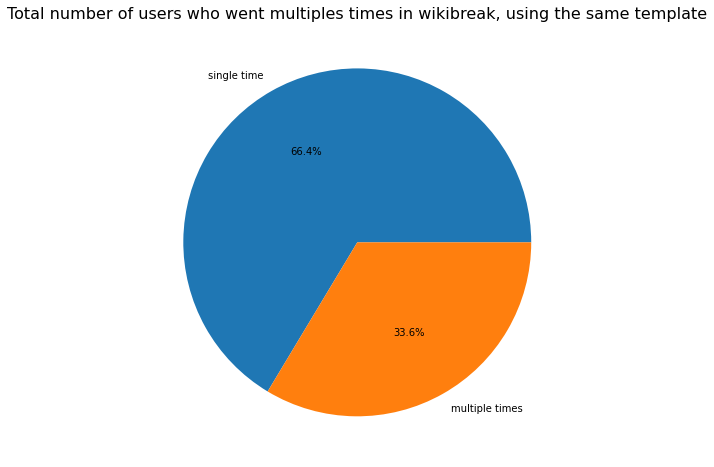

In [287]:
plt.figure(figsize=(16,8))
plt.pie(percentage_multiple_times['total'], labels=percentage_multiple_times['label'], autopct='%.1f%%')
plt.title('Total number of users who went multiples times in wikibreak, using the same template', fontsize=16)
plt.show()

### Remove ambiguous users 

In [288]:
users_multiple_times_wikibreak_not_ambiguous = spanish_wikibreaks_refactored_df
users_multiple_times_wikibreak_not_ambiguous = users_multiple_times_wikibreak_not_ambiguous.loc[users_multiple_times_wikibreak_not_ambiguous['ambiguous'] == False, ['name', 'wikibreak']]
users_multiple_times_wikibreak_not_ambiguous['count'] = 1
# users_multiple_times_wikibreak_not_ambiguous.head()

In [289]:
users_multiple_times_wikibreak_not_ambiguous.shape

(3408, 3)

In [290]:
users_multiple_times_wikibreak_not_ambiguous = users_multiple_times_wikibreak_not_ambiguous[['name', 'wikibreak', 'count']].groupby(['name', 'wikibreak']).count().reset_index()
# users_multiple_times_wikibreak_not_ambiguous.head()

In [291]:
users_multiple_times_wikibreak_not_ambiguous = users_multiple_times_wikibreak_not_ambiguous.loc[users_multiple_times_wikibreak_not_ambiguous['count'] >= 2]
# users_multiple_times_wikibreak_not_ambiguous.head()

In [292]:
total_users_multiple_wikibreak_not_ambiguous = users_multiple_times_wikibreak_not_ambiguous.shape[0]
total_users_multiple_wikibreak_not_ambiguous

511

Still over the total amount of users

In [293]:
row_total = {'total': spanish_wikibreaks_df.shape[0] - total_users_multiple_wikibreak_not_ambiguous, 'label': 'single time'}
row_multiple = {'total': total_users_multiple_wikibreak_not_ambiguous, 'label': 'multiple times'}
rows = [row_total, row_multiple]
percentage_multiple_times = pd.DataFrame(rows).reset_index(drop=True)
percentage_multiple_times

,total,label
0,1640,single time
1,511,multiple times


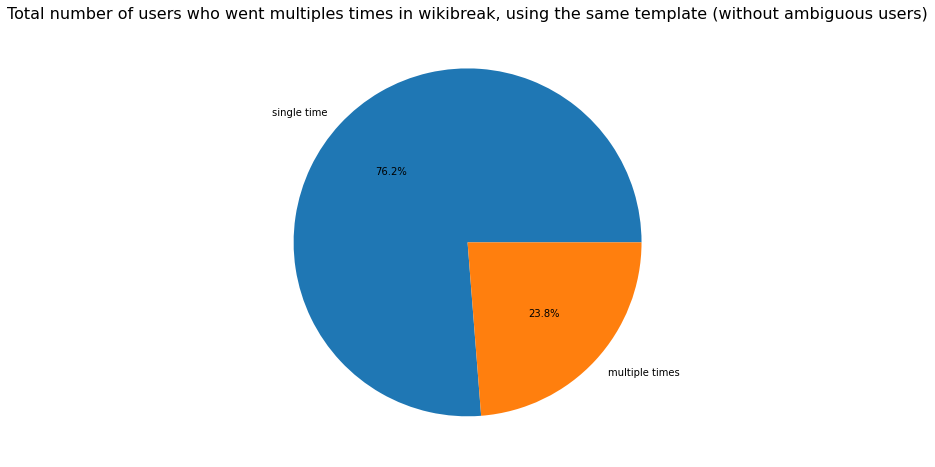

In [294]:
plt.figure(figsize=(16,8))
plt.pie(percentage_multiple_times['total'], labels=percentage_multiple_times['label'], autopct='%.1f%%')
plt.title('Total number of users who went multiples times in wikibreak, using the same template (without ambiguous users)', fontsize=16)
plt.show()

 ## Number of users who went multiples times in wikibreak (using the same subcategory)

In [295]:
# spanish_wikibreaks_refactored_df.head()

In [296]:
users_multiple_times_subcategory = spanish_wikibreaks_refactored_df
users_multiple_times_subcategory['count'] = 1
# users_multiple_times_subcategory.head()

In [297]:
users_multiple_times_subcategory.shape

(3931, 11)

In [298]:
users_multiple_times_subcategory = users_multiple_times_subcategory[['name', 'subcategory', 'count']].groupby(['name', 'subcategory']).count().reset_index()
# users_multiple_times_subcategory.head()

In [299]:
users_multiple_times_subcategory = users_multiple_times_subcategory.loc[users_multiple_times_subcategory['count'] >= 2]
# users_multiple_times_subcategory.head()

In [300]:
total_users_multiple = users_multiple_times_wikibreak.shape[0]
total_users_multiple

723

In [301]:
row_total = {'total': spanish_wikibreaks_df.shape[0] - total_users_multiple, 'label': 'single time'}
row_multiple = {'total': total_users_multiple, 'label': 'multiple times'}
rows = [row_total, row_multiple]
percentage_multiple_times = pd.DataFrame(rows).reset_index(drop=True)
percentage_multiple_times

,total,label
0,1428,single time
1,723,multiple times


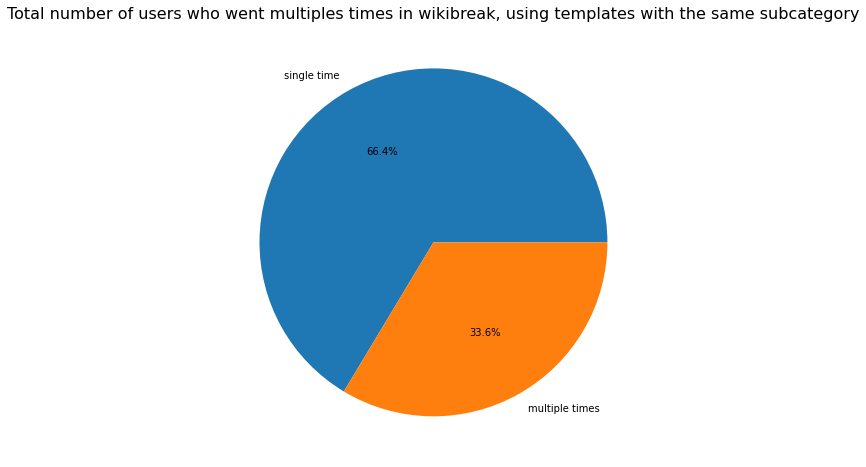

In [302]:
plt.figure(figsize=(16,8))
plt.pie(percentage_multiple_times['total'], labels=percentage_multiple_times['label'], autopct='%.1f%%')
plt.title('Total number of users who went multiples times in wikibreak, using templates with the same subcategory', fontsize=16)
plt.show()

### Remove ambiguous users 

In [303]:
users_multiple_times_subcategory_not_ambiguous = spanish_wikibreaks_refactored_df
users_multiple_times_subcategory_not_ambiguous = users_multiple_times_subcategory_not_ambiguous.loc[users_multiple_times_subcategory_not_ambiguous['ambiguous'] == False, ['name', 'subcategory']]
users_multiple_times_subcategory_not_ambiguous['count'] = 1
# users_multiple_times_subcategory_not_ambiguous.head()

In [304]:
users_multiple_times_subcategory_not_ambiguous.shape

(3408, 3)

In [305]:
users_multiple_times_subcategory_not_ambiguous = users_multiple_times_subcategory_not_ambiguous[['name', 'subcategory', 'count']].groupby(['name', 'subcategory']).count().reset_index()
# users_multiple_times_subcategory_not_ambiguous.head()

In [306]:
users_multiple_times_subcategory_not_ambiguous = users_multiple_times_subcategory_not_ambiguous.loc[users_multiple_times_subcategory_not_ambiguous['count'] >= 2]
# users_multiple_times_subcategory_not_ambiguous.head()

In [307]:
total_users_multiple_times_subcategory_not_ambiguous = users_multiple_times_subcategory_not_ambiguous.shape[0]
total_users_multiple_times_subcategory_not_ambiguous

515

Still over the total

In [308]:
row_total = {'total': spanish_wikibreaks_df.shape[0] - total_users_multiple_times_subcategory_not_ambiguous, 'label': 'single time'}
row_multiple = {'total': total_users_multiple_times_subcategory_not_ambiguous, 'label': 'multiple times'}
rows = [row_total, row_multiple]
percentage_multiple_times = pd.DataFrame(rows).reset_index(drop=True)
percentage_multiple_times

,total,label
0,1636,single time
1,515,multiple times


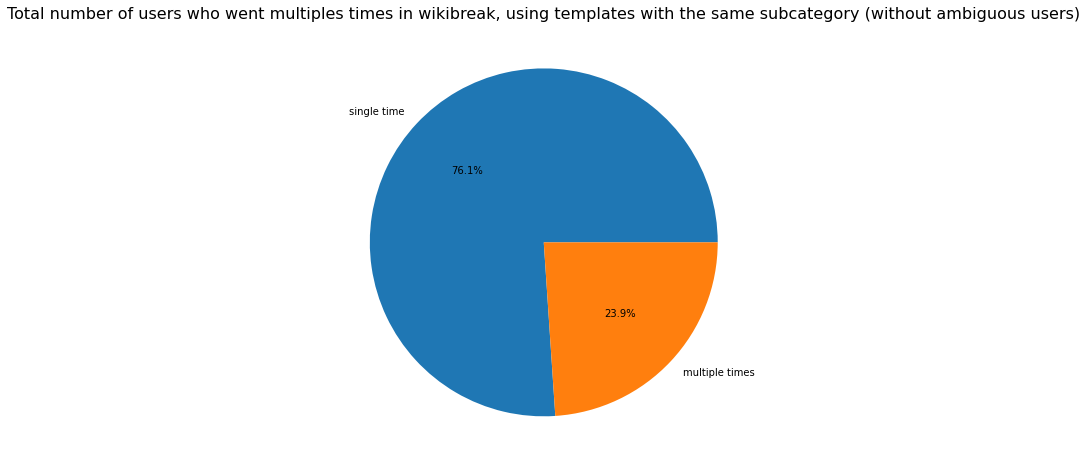

In [309]:
plt.figure(figsize=(16,8))
plt.pie(percentage_multiple_times['total'], labels=percentage_multiple_times['label'], autopct='%.1f%%')
plt.title('Total number of users who went multiples times in wikibreak, using templates with the same subcategory (without ambiguous users)', fontsize=16)
plt.show()

 ## Number of users who went multiples times in wikibreak (using the same category)

In [310]:
# spanish_wikibreaks_refactored_df.head()

#### Explicit the category

In [311]:
categories_multiple_times = spanish_wikibreaks_refactored_df[['categories', 'name']]
categories_multiple_times_refactored = list()
for i, row in spanish_wikibreaks_refactored_df.iterrows():
    for el in row['categories']:
        new_row = row
        new_row = new_row.drop('categories')
        new_row['category'] = el
        categories_multiple_times_refactored.append(new_row)
categories_multiple_times_refactored = pd.DataFrame(categories_multiple_times_refactored).reset_index(drop=True)
# categories_multiple_times_refactored.head()

In [312]:
categories_multiple_times.shape

(3931, 2)

In [313]:
categories_multiple_times_refactored = categories_multiple_times_refactored
categories_multiple_times_refactored['count'] = 1
# categories_multiple_times_refactored.head()

In [314]:
categories_multiple_times_refactored = categories_multiple_times_refactored[['name', 'category', 'count']].groupby(['name', 'category']).count().reset_index()
# categories_multiple_times_refactored.head()

In [315]:
categories_multiple_times_refactored = categories_multiple_times_refactored.loc[categories_multiple_times_refactored['count'] >= 2]
# categories_multiple_times_refactored.head()

In [316]:
total_category_multiple = categories_multiple_times_refactored.shape[0]
total_category_multiple

730

In [317]:
row_total = {'total': spanish_wikibreaks_df.shape[0] - total_category_multiple, 'label': 'single time'}
row_multiple = {'total': total_category_multiple, 'label': 'multiple times'}
rows = [row_total, row_multiple]
percentage_multiple_times = pd.DataFrame(rows).reset_index(drop=True)
percentage_multiple_times

,total,label
0,1421,single time
1,730,multiple times


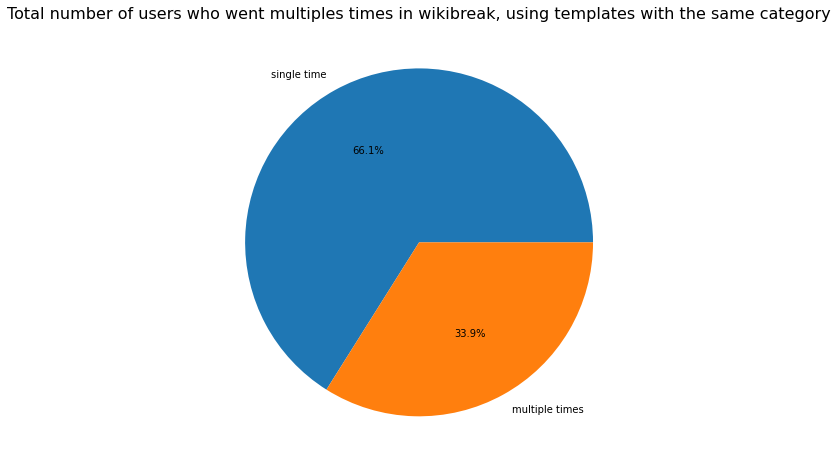

In [318]:
plt.figure(figsize=(16,8))
plt.pie(percentage_multiple_times['total'], labels=percentage_multiple_times['label'], autopct='%.1f%%')
plt.title('Total number of users who went multiples times in wikibreak, using templates with the same category', fontsize=16)
plt.show()

### Remove ambiguous users 

In [319]:
users_multiple_times_category_not_ambiguous = spanish_wikibreaks_refactored_df
users_multiple_times_category_not_ambiguous = users_multiple_times_category_not_ambiguous.loc[users_multiple_times_category_not_ambiguous['ambiguous'] == False, ['name', 'categories']]
users_multiple_times_category_not_ambiguous['count'] = 1
# users_multiple_times_category_not_ambiguous.head()

In [320]:
users_multiple_times_category_not_ambiguous_refactored = list()
for i, row in users_multiple_times_category_not_ambiguous.iterrows():
    for el in row['categories']:
        new_row = row
        new_row = new_row.drop('categories')
        new_row['category'] = el
        users_multiple_times_category_not_ambiguous_refactored.append(new_row)
users_multiple_times_category_not_ambiguous_refactored = pd.DataFrame(users_multiple_times_category_not_ambiguous_refactored).reset_index(drop=True)
# users_multiple_times_category_not_ambiguous_refactored.head()

In [321]:
users_multiple_times_category_not_ambiguous_refactored.shape

(3408, 3)

In [322]:
users_multiple_times_category_not_ambiguous_refactored = users_multiple_times_category_not_ambiguous_refactored[['name', 'category', 'count']].groupby(['name', 'category']).count().reset_index()
# users_multiple_times_category_not_ambiguous_refactored.head()

In [323]:
users_multiple_times_category_not_ambiguous_refactored = users_multiple_times_category_not_ambiguous_refactored.loc[users_multiple_times_category_not_ambiguous_refactored['count'] >= 2]
# users_multiple_times_category_not_ambiguous_refactored.head()

In [324]:
total_category_multiple_not_ambiguous = users_multiple_times_category_not_ambiguous_refactored.shape[0]
total_category_multiple_not_ambiguous

522

In [325]:
row_total = {'total': spanish_wikibreaks_df.shape[0] - total_category_multiple_not_ambiguous, 'label': 'single time'}
row_multiple = {'total': total_category_multiple_not_ambiguous, 'label': 'multiple times'}
rows = [row_total, row_multiple]
percentage_multiple_times = pd.DataFrame(rows).reset_index(drop=True)
percentage_multiple_times

,total,label
0,1629,single time
1,522,multiple times


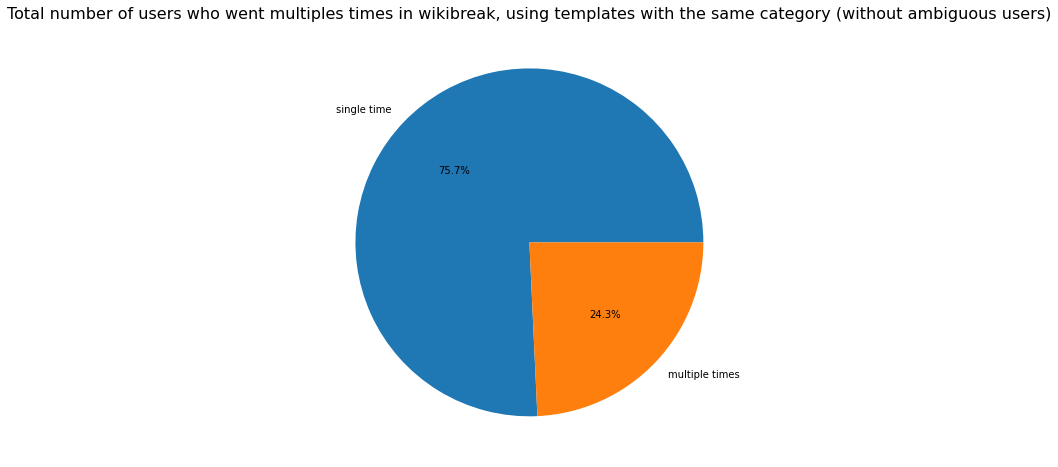

In [326]:
plt.figure(figsize=(16,8))
plt.pie(percentage_multiple_times['total'], labels=percentage_multiple_times['label'], autopct='%.1f%%')
plt.title('Total number of users who went multiples times in wikibreak, using templates with the same category (without ambiguous users)', fontsize=16)

plt.show()

# Parameters analysis

In [327]:
# spanish_wikibreaks_refactored_df.head()

## Explicit the parameters associated with the wikibreak considering each wikibreak of each user

In [328]:
parameters_explicited = list()
for i, row in spanish_wikibreaks_refactored_df.iterrows():
    for el in row['parameters']:
        new_row = row
        new_row = new_row.drop('parameters')
        new_row['parameters'] = el['options']
        parameters_explicited.append(new_row)
parameters_explicited = pd.DataFrame(parameters_explicited).reset_index(drop=True)
# parameters_explicited.head()

### Wikibreak analysis

In [329]:
wikibreaks_parameters_df_list = list()

for wikibreak in wikibreaks:
    tmp_df = parameters_explicited.loc[parameters_explicited['wikibreak'] == wikibreak, ['name', 'parameters', 'count', 'wikibreak']]
    wikibreaks_parameters_df_list.append(tmp_df.reset_index(drop=True))

In [330]:
# wikibreaks_parameters_df_list[0].head()

Empty or filled parameters

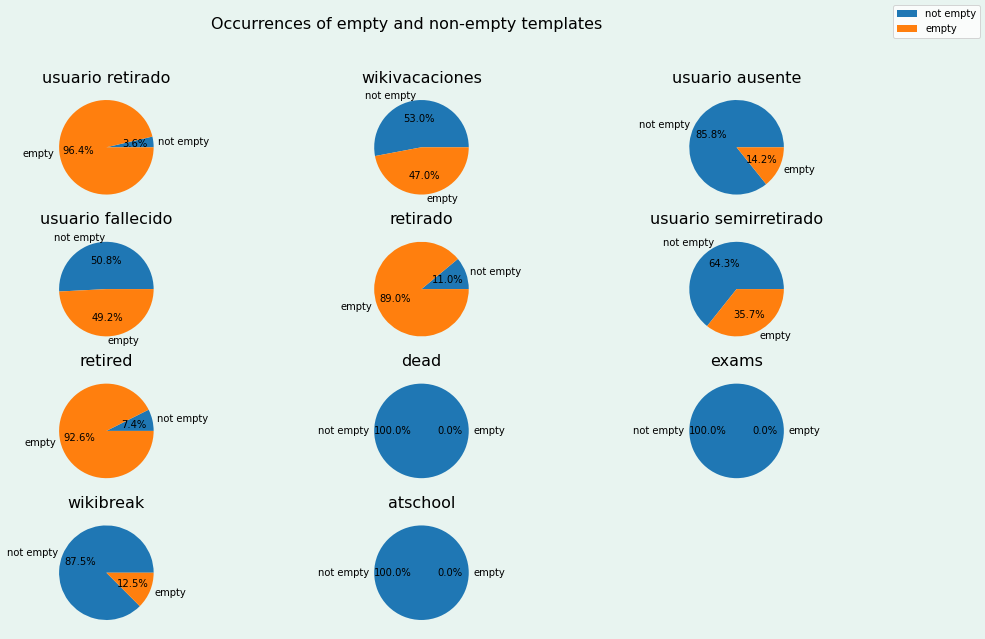

In [331]:
fig, axes = plt.subplots(math.ceil(len(wikibreaks)/3), 3, figsize=(16, 10), facecolor='#e8f4f0', squeeze=False)

last_axes = None

for i, wikibreak in enumerate(wikibreaks):
    # grouping
    extracted = wikibreaks_parameters_df_list[i]
    grouped = extracted.loc[extracted['parameters'] == {}, ['wikibreak', 'parameters', 'count']].groupby(['wikibreak']).count().reset_index(drop=True)
    total_empty = grouped['count']
    
    if not total_empty.empty:
        total_empty = total_empty[0]
    else:
        total_empty = 0
    
    # total empty over total
    row_total = {'total': extracted.shape[0] - total_empty, 'label': 'not empty'}
    row_empty = {'total': total_empty, 'label': 'empty'}
    rows = [row_total, row_empty]
    percentage_multiple_times = pd.DataFrame(rows).reset_index(drop=True)
    
    # figure
    ax = axes[i // 3, i % 3]
    ax.pie(percentage_multiple_times['total'], labels=percentage_multiple_times['label'], autopct='%.1f%%')
    ax.set_title(wikibreak, fontsize=16)
    
    last_axes = i % 3
    
    
for i in range((math.ceil(len(wikibreaks)/3) - 1) * 3 + last_axes + 1, math.ceil(len(wikibreaks)/3) * 3):
    fig.delaxes(axes.flatten()[i])

    
fig.suptitle('Occurrences of empty and non-empty templates', fontsize=16)
fig.legend(['not empty', 'empty'])
plt.show()

Total filled over parameterized

In [332]:
total_without_parameters = parameters_explicited.loc[parameters_explicited['parameters'] == {}, ['wikibreak', 'parameters', 'count']]
total_without_parameters.head()

,wikibreak,parameters,count
0,usuario retirado,{},1
1,usuario retirado,{},1
2,usuario retirado,{},1
4,usuario retirado,{},1
5,usuario retirado,{},1


In [333]:
row_total = {'total': parameters_explicited.shape[0] - total_without_parameters.shape[0], 'label': 'not empty'}
row_empty = {'total': total_without_parameters.shape[0], 'label': 'empty'}
rows = [row_total, row_empty]
percentage_multiple_times = pd.DataFrame(rows).reset_index(drop=True)
percentage_multiple_times.head()

,total,label
0,1989,not empty
1,2619,empty


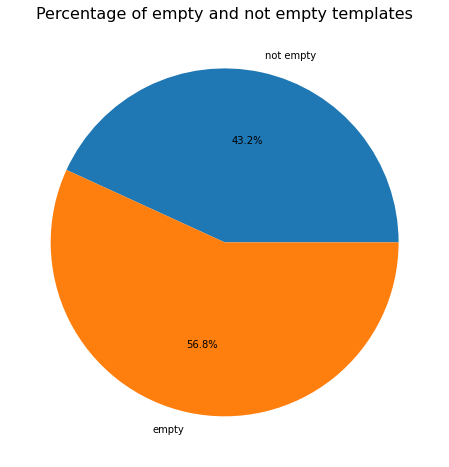

In [334]:
plt.figure(figsize=(16,8))
plt.pie(percentage_multiple_times['total'], labels=percentage_multiple_times['label'], autopct='%.1f%%')
plt.title('Percentage of empty and not empty templates', fontsize=16)
plt.show()

## Most used parameter per template

In [335]:
# dataframes for wikibreaks with param name and value
last_axes = None
most_used_parameters_per_template_df_list = list()

for i, wikibreak in enumerate(wikibreaks):
    # grouping
    extracted = wikibreaks_parameters_df_list[i]
    grouped = extracted.loc[extracted['parameters'] != {}, ['wikibreak', 'parameters', 'count']]
    most_used_parameters_per_template_list = list()
    for i, row in extracted.iterrows():
        for key, value in row['parameters'].items():
            new_row = row
            new_row = new_row.drop('parameters')
            new_row['param_name'] = key
            new_row['param_value'] = value
            most_used_parameters_per_template_list.append(new_row)
    most_used_parameters_per_template_df_list.append(pd.DataFrame(most_used_parameters_per_template_list).reset_index(drop=True))

#most_used_parameters_per_template_df_list[0].head()

In [336]:
most_used_parameters_per_template_df_list[0].shape

(68, 5)

In [337]:
most_used_parameters_per_template_grouped_df_list = list()
for i, wikibreak in enumerate(wikibreaks):
    # grouping
    extracted = most_used_parameters_per_template_df_list[i]
    if not extracted.empty:
        extracted['param_name'] = extracted['param_name'].str.strip()
        extracted = extracted[['count', 'wikibreak', 'param_name']].groupby(['param_name', 'wikibreak']).count().reset_index(drop=False)
    most_used_parameters_per_template_grouped_df_list.append(extracted)
most_used_parameters_per_template_grouped_df_list[0].head()

,param_name,wikibreak,count
0,1,usuario retirado,68


## Most used parameters per wikibreak

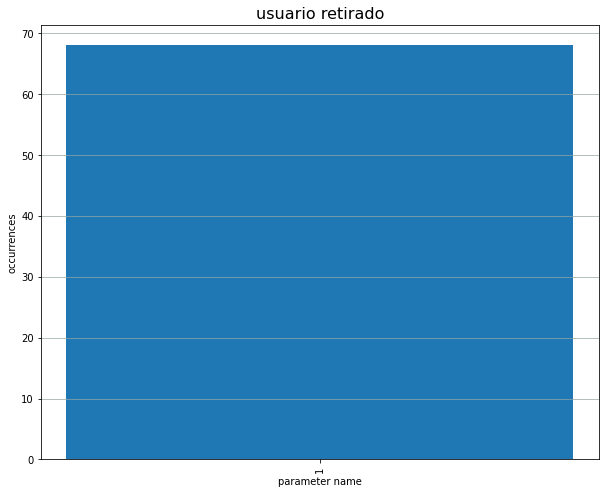

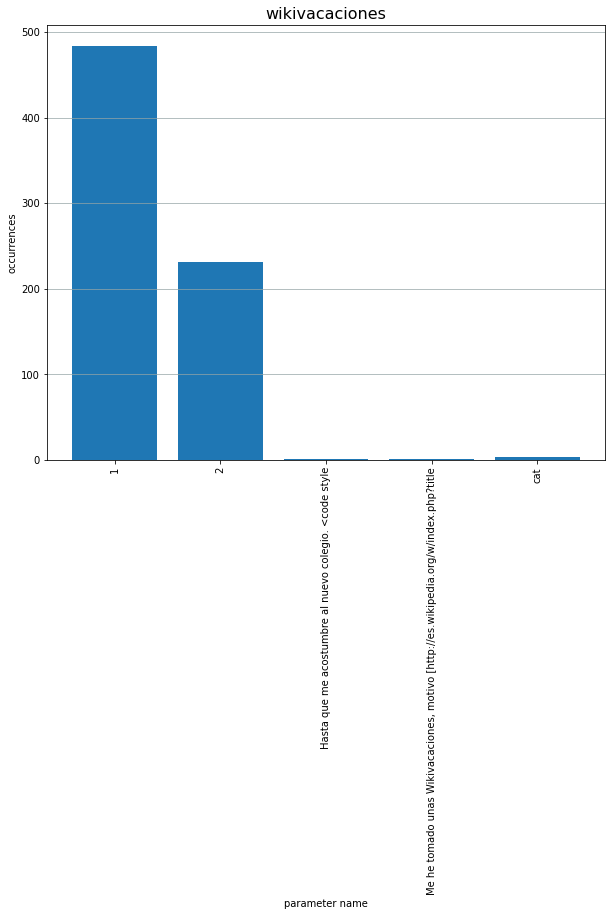

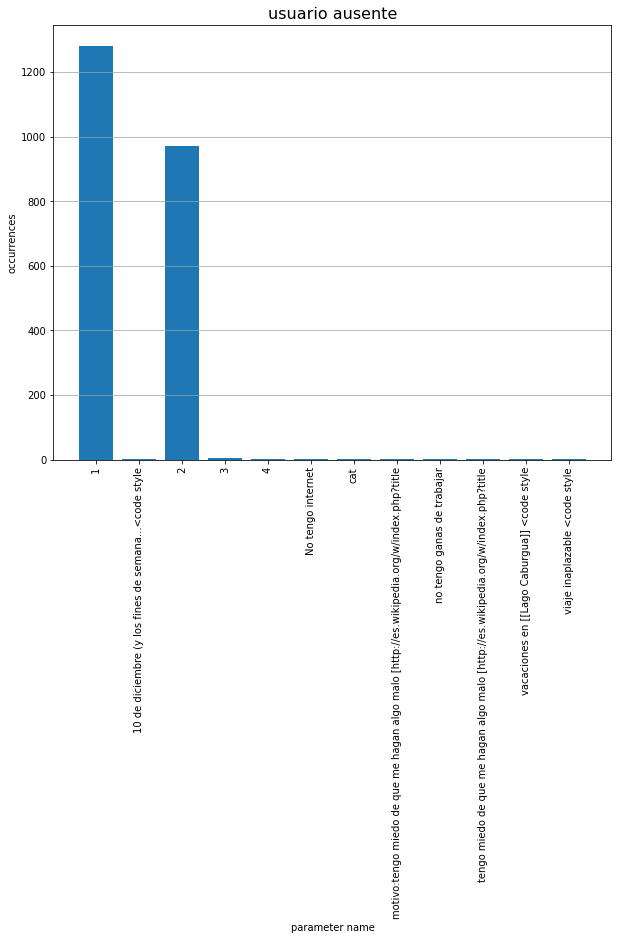

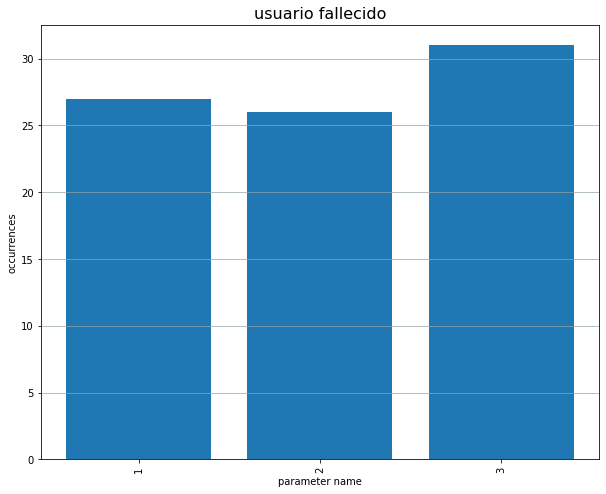

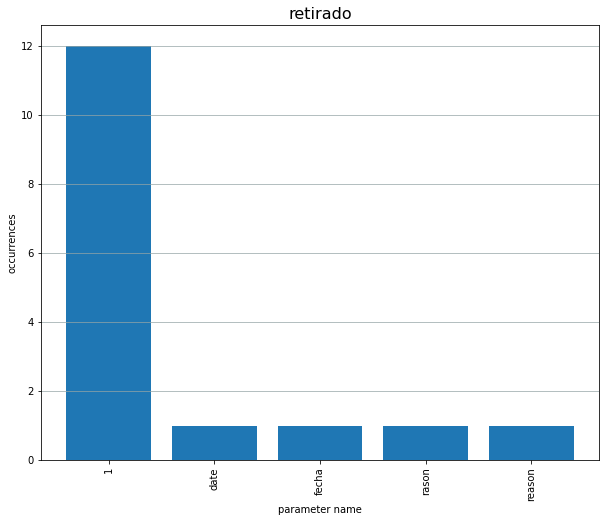

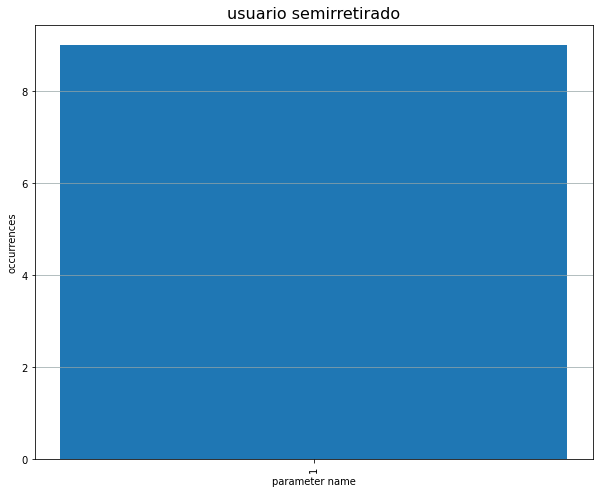

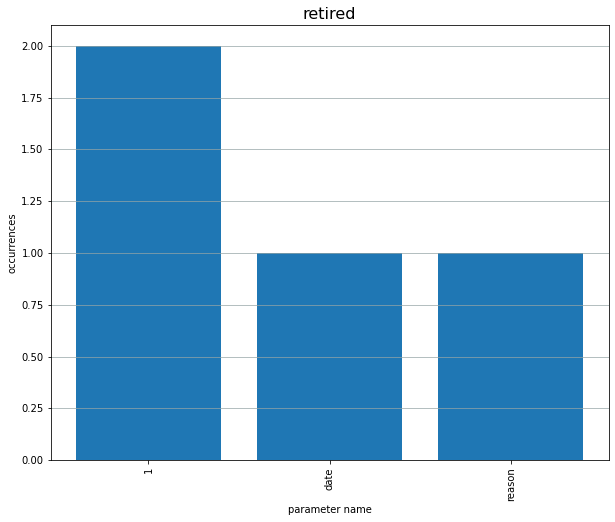

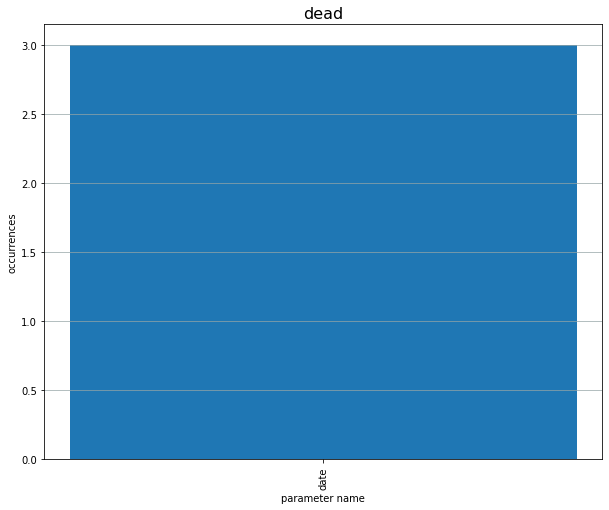

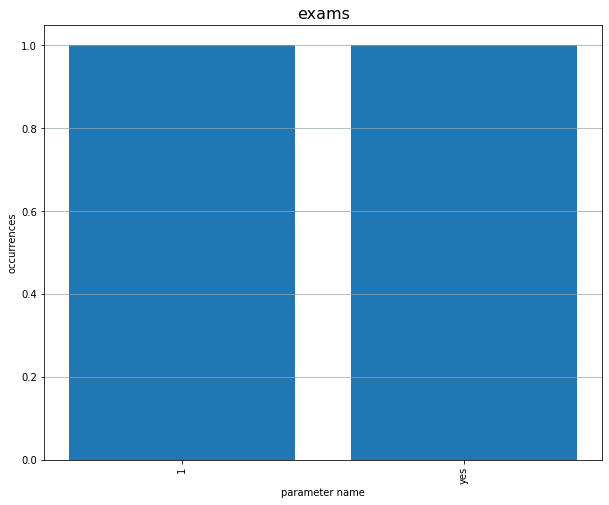

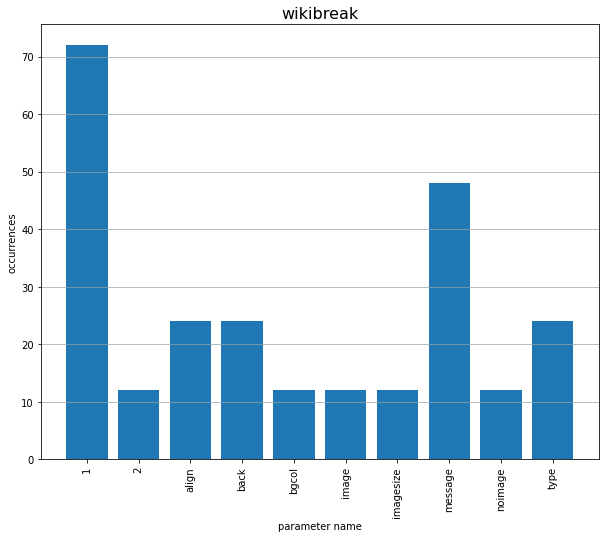

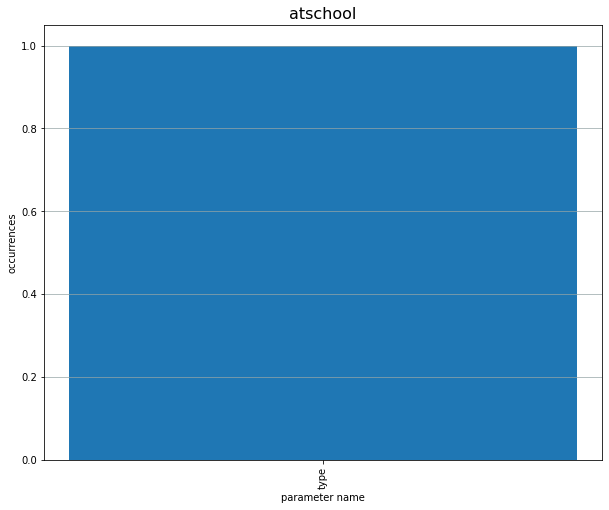

In [338]:
for i, wikibreak in enumerate(wikibreaks):
    # grouping
    extracted = most_used_parameters_per_template_grouped_df_list[i]
    
    if not extracted.empty:
        plt.figure(figsize=(10,8))
        plt.bar(most_used_parameters_per_template_grouped_df_list[i]['param_name'], most_used_parameters_per_template_grouped_df_list[i]['count'])
        plt.title(wikibreak, fontsize=16)
        plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
        plt.xticks(rotation='vertical')
        plt.ylabel('occurrences')
        plt.xlabel('parameter name')
        plt.show()

## Some paramers in textual form

In [339]:
for i, wikibreak in enumerate(wikibreaks):
    # grouping
    extracted = most_used_parameters_per_template_df_list[i]
    if not extracted.empty:
        print('Template name: ', wikibreak)
        print('------------------------------------------------------------------')
        for i, val in extracted.sort_values(['param_name', 'count']).iterrows():
            print('Param name:', val['param_name'], 'param value:', val['param_value'], 'occurrences:', val['count'])
        print('------------------------------------------------------------------')

Template name:  usuario retirado
------------------------------------------------------------------
Param name: 1 param value: para empezar de nuevo con otra cuenta. occurrences: 1
Param name: 1 param value: por haber contribuido a la Wikipedia lo suficiente occurrences: 1
Param name: 1 param value: Adiós Wikipedia y todos los buenos usuarios que conocí, aquí y en Wikipedia en inglés, dejaré [https://es.wikipedia.org/w/index.php?title=Wikipedia:Tabl%C3%B3ndeanunciosdelosbibliotecarios/Portal/Archivo/Miscel%C3%A1nea/Actual&diff=126993876&oldid=126989996 aquí mis motivos]. ¡Saludos! occurrences: 1
Param name: 1 param value: Por razones que prefiero no especificar, además de que estoy muy ocupado, he decidido abandonar mi cuenta de Wikipedia occurrences: 1
Param name: 1 param value: Por razones que prefiero no especificar, además de que estoy muy ocupado, he decidido abandonar mi cuenta de Wikipedia occurrences: 1
Param name: 1 param value: Últimamente ya no entro a wikipedia asi que me r

Param name: 1 param value: ...calculo que finales de noviembre occurrences: 1
Param name: 1 param value: ...calculo que finales de noviembre occurrences: 1
Param name: 1 param value: ... occurrences: 1
Param name: 1 param value: final de mes occurrences: 1
Param name: 1 param value: 11 de enero occurrences: 1
Param name: 1 param value: 11 de enero occurrences: 1
Param name: 1 param value: 11 de enero occurrences: 1
Param name: 1 param value: 01/10/2011 occurrences: 1
Param name: 1 param value: 11/10/2011 occurrences: 1
Param name: 1 param value: 11/10/2011 occurrences: 1
Param name: 1 param value: 25 de marzo  occurrences: 1
Param name: 1 param value: 24 de diciembre de 2011 occurrences: 1
Param name: 1 param value: 2 de enero occurrences: 1
Param name: 1 param value: final de unos asuntillos laborales (no todo va a ser [[enciclopedismo]]) occurrences: 1
Param name: 1 param value: final de unos asuntillos laborales (no todo va a ser [[enciclopedismo]]) occurrences: 1
Param name: 1 para

Param name: 1 param value: Maté la pantalla de mi computador... occurrences: 1
Param name: 1 param value: 8 de septiembre occurrences: 1
Param name: 1 param value: Wikiagotamiento. Poco tiempo libre y mucho que realizar. Espero volver pronto, por que lo haré. No estaré leyendo mensajes. Gracias. occurrences: 1
Param name: 1 param value: Poco tiempo libre y mucho que realizar. Espero volver pronto, por que lo haré. No estaré leyendo mensajes. Gracias. occurrences: 1
Param name: 1 param value: dentro de algunos días occurrences: 1
Param name: 1 param value: 14 de diciembre occurrences: 1
Param name: 1 param value: 3 de enero occurrences: 1
Param name: 1 param value: 15 de junio occurrences: 1
Param name: 1 param value: día que arregle el ordenador occurrences: 1
Param name: 1 param value: 26 de diciembre occurrences: 1
Param name: 1 param value: 26 de diciembre occurrences: 1
Param name: 1 param value: alrededor del 13 de abril occurrences: 1
Param name: 1 param value: alrededor del 13 d

Param name: 1 param value: 14 de abril occurrences: 1
Param name: 1 param value: 25 de julio occurrences: 1
Param name: 1 param value: 5 de mayo occurrences: 1
Param name: 1 param value: 5 de enero occurrences: 1
Param name: 1 param value: 5 de enero occurrences: 1
Param name: 1 param value: 26 de febrero occurrences: 1
Param name: 1 param value: 23 de septiembre. En septiembre también se puede ir a la playa. occurrences: 1
Param name: 1 param value: viernes 4 occurrences: 1
Param name: 1 param value: viernes 4, aunque pasaré por aquí de vez en cuando occurrences: 1
Param name: 1 param value: dentro de unos meses... sin fecha de retorno occurrences: 1
Param name: 1 param value: que mi compu esté arreglada occurrences: 1
Param name: 1 param value: 2 de enero de 2006 (desde el 20 de diciembre) occurrences: 1
Param name: 1 param value: 2 de enero de 2006 (desde el 20 de diciembre). occurrences: 1
Param name: 1 param value: 2 de enero de 2006 (desde el 20 de diciembre). occurrences: 1
Para

Param name: 2 param value: vacaciones reales occurrences: 1
Param name: 2 param value: enfermedad occurrences: 1
Param name: 2 param value: Mucho trabajo y viajes por idem, no voy a estar conectado lo suficiente como para editar en Wikipedia occurrences: 1
Param name: 2 param value: Tesis y proyecto de titulación occurrences: 1
Param name: 2 param value: Sin internet por mudansa occurrences: 1
Param name: 2 param value: No tengo Internet... :-( occurrences: 1
Param name: 2 param value: No tengo Internet... :-( occurrences: 1
Param name: 2 param value: No tengo Internet... :-( occurrences: 1
Param name: 2 param value: Muy estresado occurrences: 1
Param name: 2 param value: Personal occurrences: 1
Param name: 2 param value: Personal occurrences: 1
Param name: 2 param value: Personal occurrences: 1
Param name: 2 param value: Tendría que estudiar... ¡algo!<br /><small>(Sed buenos, [[RSS]] os vigila)</small> occurrences: 1
Param name: 2 param value: '''''Vini, vidi, Da Vinci''''' occurrence

Param name: 2 param value: Viaje a [[Perú]] con [[User:Galio|Galio]], [[User:Mahadeva|Mahadeva]], [[User:Pyr0|Pyr0]], [[User:Aleposta|Aleposta]] y [[User:JuanIgnacioIglesias|JuanIgnacioIglesias]] occurrences: 1
Param name: 2 param value: Vacaciones occurrences: 1
Param name: 2 param value: vacaciones occurrences: 1
Param name: 2 param value: Disfrutando unas merecidas vacaciones occurrences: 1
Param name: 2 param value: Disfrutando unas merecidas vacaciones occurrences: 1
Param name: 2 param value: Viaje a [[Perú]] con [[User:Galio|Galio]], [[User:Mahadeva|Mahadeva]], [[User:Pyr0|Pyr0]], [[User:Isha|Isha]] y [[User:JuanIgnacioIglesias|JuanIgnacioIglesias]] occurrences: 1
Param name: 2 param value: Tengo mucha fiebre y estoy haciendo una maratón de Tintín occurrences: 1
Param name: 2 param value: Me da miedo llegar a las 1300 ediciones y mañana estaré ocupado occurrences: 1
Param name: 2 param value: Estoy sufriendo una depresión occurrences: 1
Param name: 2 param value: Yo... he dicho 

Param name: 1 param value: 01/01/2021 occurrences: 1
Param name: 1 param value: Estoy estresado, tengo examenes y tengo que viajar para navidad. Así que no se cuando volveré. A veces estare activo en el IRC occurrences: 1
Param name: 1 param value: 21/11/2020 occurrences: 1
Param name: 1 param value: 21 de enero de 2021 occurrences: 1
Param name: 1 param value: 03-01-2021 occurrences: 1
Param name: 1 param value: 11-01-2021 occurrences: 1
Param name: 1 param value: 10-01-2021 occurrences: 1
Param name: 1 param value: 03-02-2021 occurrences: 1
Param name: 1 param value: 9 ó 10 .04.2007 occurrences: 1
Param name: 1 param value: 20 de abril occurrences: 1
Param name: 1 param value: 20.04.2007 occurrences: 1
Param name: 1 param value: 16 de julio occurrences: 1
Param name: 1 param value: algunos dias occurrences: 1
Param name: 1 param value: "indefinido" occurrences: 1
Param name: 1 param value: fecha occurrences: 1
Param name: 1 param value: 11 de junio occurrences: 1
Param name: 1 param 

Param name: 1 param value: 18/12/2011 occurrences: 1
Param name: 1 param value: 10 de Marzo, app. occurrences: 1
Param name: 1 param value: Marzo 2009 occurrences: 1
Param name: 1 param value: 30 de junio occurrences: 1
Param name: 1 param value: 30 de junio occurrences: 1
Param name: 1 param value: 10/4/06 occurrences: 1
Param name: 1 param value: principio de 2008 occurrences: 1
Param name: 1 param value: fecha de regreso occurrences: 1
Param name: 1 param value: aun no se occurrences: 1
Param name: 1 param value: pronto occurrences: 1
Param name: 1 param value: 15 de octubre occurrences: 1
Param name: 1 param value: 15 de abril... más o menos occurrences: 1
Param name: 1 param value: 1 de abril de 2020 occurrences: 1
Param name: 1 param value: 1 de abril de 2020 occurrences: 1
Param name: 1 param value: 10 de julio de 2020 occurrences: 1
Param name: 1 param value: 1 de agosto de 2020 occurrences: 1
Param name: 1 param value: 10 de julio de 2020 occurrences: 1
Param name: 1 param val

Param name: 1 param value: Sin internet en mi casa... occurrences: 1
Param name: 1 param value: 09/02/2014 occurrences: 1
Param name: 1 param value: 09/08/2014 occurrences: 1
Param name: 1 param value: 20/07/2015 occurrences: 1
Param name: 1 param value: 20/12/2015 occurrences: 1
Param name: 1 param value: 31/12/11 occurrences: 1
Param name: 1 param value: 31/12/11 occurrences: 1
Param name: 1 param value: [[15 de octubre]] de [[2011]].<br/>Si necesitas un [[WP:B|bibliotecario]], acude al [[WP:TAB|Tablón]] occurrences: 1
Param name: 1 param value: 01/12/2011 occurrences: 1
Param name: 1 param value: ?? occurrences: 1
Param name: 1 param value: Verano occurrences: 1
Param name: 1 param value: que me pongan internet de nuevo xD occurrences: 1
Param name: 1 param value: 04/03/2012 occurrences: 1
Param name: 1 param value: 23/03/2012 occurrences: 1
Param name: 1 param value: 23/03/2012 occurrences: 1
Param name: 1 param value: día que termine mi bloqueo occurrences: 1
Param name: 1 param v

Param name: 1 param value: Posible trabajo, editare poco estas dos semanas occurrences: 1
Param name: 1 param value: 12/2/2012 occurrences: 1
Param name: 1 param value: 12 de febrero de 2012 occurrences: 1
Param name: 1 param value: 12 de febrero de 2012 occurrences: 1
Param name: 1 param value: no se cuando occurrences: 1
Param name: 1 param value: no se cuando occurrences: 1
Param name: 1 param value: principios de enero occurrences: 1
Param name: 1 param value: principios de febrero occurrences: 1
Param name: 1 param value: inicio de febrero occurrences: 1
Param name: 1 param value: principios de enero occurrences: 1
Param name: 1 param value: principios de enero occurrences: 1
Param name: 1 param value: principios de febrero occurrences: 1
Param name: 1 param value: inicio de febrero occurrences: 1
Param name: 1 param value: lunes de la próxima semana occurrences: 1
Param name: 1 param value: lunes próximo  occurrences: 1
Param name: 1 param value: prox fin de semana occurrences: 1

Param name: 1 param value: ni se sabe occurrences: 1
Param name: 1 param value: ni se sabe occurrences: 1
Param name: 1 param value: ni se sabe occurrences: 1
Param name: 1 param value: ni se sabe occurrences: 1
Param name: 1 param value: ni se sabe occurrences: 1
Param name: 1 param value: en unos 2 meses occurrences: 1
Param name: 1 param value: ...cuando pueda occurrences: 1
Param name: 1 param value: 28 de febrero occurrences: 1
Param name: 1 param value: Martes 22 occurrences: 1
Param name: 1 param value: día en que el [[Transantiago]] funcione occurrences: 1
Param name: 1 param value: 20-7-12 (aprox) occurrences: 1
Param name: 1 param value: fecha de regreso occurrences: 1
Param name: 1 param value: día que acaben los exámenes, hacia finales de junio occurrences: 1
Param name: 1 param value: día que acaben los exámenes, hacia finales de junio occurrences: 1
Param name: 1 param value: día que acaben los exámenes, hacia finales de junio occurrences: 1
Param name: 1 param value: 01/

Param name: 1 param value: 25 de noviembre occurrences: 1
Param name: 1 param value: 25 de noviembre occurrences: 1
Param name: 1 param value: 2 de diciembre occurrences: 1
Param name: 1 param value: 6 de diciembre occurrences: 1
Param name: 1 param value: nuevo aviso occurrences: 1
Param name: 1 param value: nuevo aviso occurrences: 1
Param name: 1 param value: 2 de enero del 2011 occurrences: 1
Param name: 1 param value: 2 de enero del 2011 occurrences: 1
Param name: 1 param value: 2 de enero del 2011 occurrences: 1
Param name: 1 param value: [[9 de febrero]] occurrences: 1
Param name: 1 param value: 14 al 21 de febrero occurrences: 1
Param name: 1 param value: 14 al 21 de febrero occurrences: 1
Param name: 1 param value: 21 de febrero occurrences: 1
Param name: 1 param value: 6 de junio occurrences: 1
Param name: 1 param value: indefinidamente occurrences: 1
Param name: 1 param value: 4 de julio occurrences: 1
Param name: 1 param value: próximo [[2 de julio]] de [[2011|este año]] oc

Param name: 1 param value: 30 de abril occurrences: 1
Param name: 1 param value: 30 de abril occurrences: 1
Param name: 1 param value: indefinidas occurrences: 1
Param name: 1 param value: 01/09/2011 occurrences: 1
Param name: 1 param value: 31 de agosto occurrences: 1
Param name: 1 param value: 31 de agosto occurrences: 1
Param name: 1 param value: 01/12/2015 occurrences: 1
Param name: 1 param value: 01/12/2015 occurrences: 1
Param name: 1 param value: 01/12/2015 occurrences: 1
Param name: 1 param value: fecha de regreso occurrences: 1
Param name: 1 param value: después de un período de tiempo indefinido occurrences: 1
Param name: 1 param value: Llegé a las 1000 ediciones, necesito celebrarlo, un saludo.
KosmoGelo occurrences: 1
Param name: 1 param value: Cuenta inactiva, ir a [[Usuario:(KGC2) KosmoGelo II]] occurrences: 1
Param name: 1 param value: Cuenta inactiva debido a fallo y cambio de correo, ir a [[Usuario:(KGC2) KosmoGelo II]] occurrences: 1
Param name: 1 param value: Domingo

Param name: 2 param value: motivo occurrences: 1
Param name: 2 param value: vacaciones occurrences: 1
Param name: 2 param value: motivo occurrences: 1
Param name: 2 param value: vacaciones occurrences: 1
Param name: 2 param value: motivo occurrences: 1
Param name: 2 param value: vacaciones occurrences: 1
Param name: 2 param value: motivo occurrences: 1
Param name: 2 param value: vacaciones occurrences: 1
Param name: 2 param value: motivo occurrences: 1
Param name: 2 param value: vacaciones occurrences: 1
Param name: 2 param value: motivo occurrences: 1
Param name: 2 param value: vacaciones occurrences: 1
Param name: 2 param value: motivo occurrences: 1
Param name: 2 param value: vacaciones occurrences: 1
Param name: 2 param value: motivo occurrences: 1
Param name: 2 param value: vacaciones occurrences: 1
Param name: 2 param value: motivo occurrences: 1
Param name: 2 param value: vacaciones occurrences: 1
Param name: 2 param value: motivo occurrences: 1
Param name: 2 param value: vacaci

Param name: 2 param value: <Navidad y Año Nuevo> occurrences: 1
Param name: 2 param value: Navidad y Año Nuevo occurrences: 1
Param name: 2 param value: me voy al pueblo, y no tendré tiempo de meterme en Internet. occurrences: 1
Param name: 2 param value: harto, no vale la pena occurrences: 1
Param name: 2 param value: harto, no vale la pena occurrences: 1
Param name: 2 param value: Puede que realice ediciones mínimas pero difícilmente pueda contestar antes del próximo lunes occurrences: 1
Param name: 2 param value: Wikivacaciones por poco tiempo libre occurrences: 1
Param name: 2 param value: Wikivacaciones por poco tiempo libre occurrences: 1
Param name: 2 param value: Viajes y reorganizamiento occurrences: 1
Param name: 2 param value: De viaje. <br/>Si requieres urgencia, recomiendo que contactes a otro [[WP:B|bibliotecario]] o acudas al [[WP:TAB|tablón de bibliotecarios]] occurrences: 1
Param name: 2 param value: De viaje. <br/>Si requieres urgencia, recomiendo que contactes a otro

Param name: 2 param value: Obligaciones de la vida exterior occurrences: 1
Param name: 2 param value: [[Adeudo|Razones]] [[Telmex|personales]] occurrences: 1
Param name: 2 param value: no estaré aquí occurrences: 1
Param name: 2 param value: Agunos impedimentos, pero durarán dos semanas aprox. occurrences: 1
Param name: 2 param value: Agunos inpedimentos, pero durarán dos semanas aprox. occurrences: 1
Param name: 2 param value: Agunos inpedimentos, pero durarán dos semanas aprox. occurrences: 1
Param name: 2 param value: Las vacaciones de Verano, es perfecto para reponer fuerzas de todo el año. occurrences: 1
Param name: 2 param value: Asuntos que atender fuera de Wikipedia occurrences: 1
Param name: 2 param value: [Varios] asuntos que atender fuera de Wikipedia occurrences: 1
Param name: 2 param value: Un viajecito; igual, si hay un cyber por ahí... Si es urgente, buscá a [[WP:B|otro biblio]]. occurrences: 1
Param name: 2 param value: Un viajecito; igual, si hay un cyber por ahí... Si

Param name: 2 param value: Me enfocaré en mis estudios occurrences: 1
Param name: 2 param value: Me enfocaré en mis estudios. Vendré de vez en cuando... occurrences: 1
Param name: 2 param value: No tengo internet. Vendré de vez en cuando a actualizar... occurrences: 1
Param name: 2 param value: No tengo internet. Regresaré el 9 de septiembre o antes... occurrences: 1
Param name: 2 param value: No tengo internet. Regresaré en ese día o antes a actualizar... occurrences: 1
Param name: 2 param value: Me tomaré un descanso de fin de año, pero vendré a actualizar de vez en cuando... occurrences: 1
Param name: 2 param value: Tengo vacaciones y no podré accesar al internet. Actualizaría los sábados y/o domingos, sí se puede. occurrences: 1
Param name: 2 param value: Poco tiempo libre, actualizaré de vez en cuando occurrences: 1
Param name: 2 param value: Poco tiempo libre, actualizaré de vez en cuando occurrences: 1
Param name: 2 param value: Cosas Personales occurrences: 1
Param name: 2 para

Param name: 2 param value: no voy a estar en casa occurrences: 1
Param name: 2 param value: No voy a estar en casa. occurrences: 1
Param name: 2 param value: motivo occurrences: 1
Param name: 2 param value: No les importa... occurrences: 1
Param name: 2 param value: vacaciones familiares occurrences: 1
Param name: 2 param value: motivo occurrences: 1
Param name: 2 param value: falta de tiempo occurrences: 1
Param name: 2 param value: falta de tiempo urgente occurrences: 1
Param name: 2 param value: falta de tiempo urgente occurrences: 1
Param name: 2 param value: Curso de [[bioinformática]] en una universidad [[Escandinavia|escandinava]] occurrences: 1
Param name: 2 param value: Por motivos de router voy a estar inhabilitado por un par de días hasta que me lo arreglen o lo declaren fallecido y me compre otro. Sin embargo, cada noche probablemente me conecte un rato, de modo que si quieren dejarme un mensaje, los invito a hacerlos que serán respondidos lo más pronto que me sea posible. 

Param name: 2 param value: '''tipo que eso es '''re''' personal. Hacerle ese tipo de preguntas a alguien que apenas conocés es realmente una falta de educación. ¿Quién te creés que sos para ahondar en la vida privada de la gente? ¿[[Jorge Rial]]?. ¡Aguante [[Viviana Canosa]]!. ¿Vieron que ahora hace teatro? está bien que hoy en día todas las vedettes son parecidas y que deberían tener un logo para poder reconocerlas, pero man, es una plasticola con peluca. occurrences: 1
Param name: 2 param value: '''tipo que eso es '''re''' personal. Hacerle ese tipo de preguntas a alguien que apenas conocés es realmente una falta de educación. ¿Quién te creés que sos para ahondar en la vida privada de la gente? ¿[[Jorge Rial]]?. ¡Aguante [[Viviana Canosa]]!. ¿Vieron que ahora hace teatro? está bien que hoy en día todas las vedettes son parecidas y que deberían tener un logo para poder reconocerlas, pero man, es una plasticola con peluca. occurrences: 1
Param name: 2 param value: Estoy en México occur

Param name: 1 param value: debido a falta de motivación y de tiempo para contribuir activamente a la Wikipedia. occurrences: 1
------------------------------------------------------------------
Template name:  retired
------------------------------------------------------------------
Param name: 1 param value: } occurrences: 1
Param name: 1 param value: RETIRED PERMANENTLY occurrences: 1
Param name: date param value: April 2018 occurrences: 1
Param name: reason param value: due to personal issues occurrences: 1
------------------------------------------------------------------
Template name:  dead
------------------------------------------------------------------
Param name: date param value: October 2014 occurrences: 1
Param name: date param value: May 2020 occurrences: 1
Param name: date param value: January 2017 occurrences: 1
------------------------------------------------------------------
Template name:  exams
------------------------------------------------------------------
Pa

In [340]:
wikibreaks

array(['usuario retirado', 'wikivacaciones', 'usuario ausente',
       'usuario fallecido', 'retirado', 'usuario semirretirado',
       'retired', 'dead', 'exams', 'wikibreak', 'atschool'], dtype=object)

## Some motivations

### Usuario retirado

In [341]:
usuario_retirado_index, = np.where(wikibreaks == 'usuario retirado')[0]
param_list = ['1']
usuario_retirado_index

0

In [342]:
extracted = most_used_parameters_per_template_df_list[usuario_retirado_index]
if not extracted.empty:
    print('USUARIO RETIRADO:')
    print('------------------------------------------------------------------')
    for param in param_list:
        for i, val in extracted.loc[extracted['param_name'] == param].sort_values(['param_name', 'count']).iterrows():
            print('Param name:', val['param_name'], 'param value:', val['param_value'], 'occurrences:', val['count'])
    print('------------------------------------------------------------------')

USUARIO RETIRADO:
------------------------------------------------------------------
Param name: 1 param value: para empezar de nuevo con otra cuenta. occurrences: 1
Param name: 1 param value: por haber contribuido a la Wikipedia lo suficiente occurrences: 1
Param name: 1 param value: Adiós Wikipedia y todos los buenos usuarios que conocí, aquí y en Wikipedia en inglés, dejaré [https://es.wikipedia.org/w/index.php?title=Wikipedia:Tabl%C3%B3ndeanunciosdelosbibliotecarios/Portal/Archivo/Miscel%C3%A1nea/Actual&diff=126993876&oldid=126989996 aquí mis motivos]. ¡Saludos! occurrences: 1
Param name: 1 param value: Por razones que prefiero no especificar, además de que estoy muy ocupado, he decidido abandonar mi cuenta de Wikipedia occurrences: 1
Param name: 1 param value: Por razones que prefiero no especificar, además de que estoy muy ocupado, he decidido abandonar mi cuenta de Wikipedia occurrences: 1
Param name: 1 param value: Últimamente ya no entro a wikipedia asi que me retiraré y no vo

### Wikivacaciones

In [343]:
wikivacaciones_index, = np.where(wikibreaks == 'wikivacaciones')[0]
param_list = ['2']
wikivacaciones_index

1

In [344]:
extracted = most_used_parameters_per_template_df_list[wikivacaciones_index]
if not extracted.empty:
    print('WIKIVACACIONES:')
    print('------------------------------------------------------------------')
    for param in param_list:
        for i, val in extracted.loc[extracted['param_name'] == param].sort_values(['param_name', 'count']).iterrows():
            print('Param name:', val['param_name'], 'param value:', val['param_value'], 'occurrences:', val['count'])
    print('------------------------------------------------------------------')

WIKIVACACIONES:
------------------------------------------------------------------
Param name: 2 param value: a-isla-rme occurrences: 1
Param name: 2 param value: vacaciones!!! occurrences: 1
Param name: 2 param value: mudanza monstruosa... trabajo... quehaceres diarios... occurrences: 1
Param name: 2 param value: Otravez de viaje, pero a [[Bucaramanga|esta ciudad]] occurrences: 1
Param name: 2 param value: Otravez de viaje, pero a [[Bucaramanga|esta ciudad]] occurrences: 1
Param name: 2 param value: aventuras de montaña occurrences: 1
Param name: 2 param value: Viaje a un lugar desprovisto de Internet. Tocara llevar libros... y papel. Y un lápiz. occurrences: 1
Param name: 2 param value: Viaje a un lugar desprovisto de Internet. Tocara llevar libros... y papel. Y un lápiz. occurrences: 1
Param name: 2 param value: está de vacaciones occurrences: 1
Param name: 2 param value: está de vacaciones occurrences: 1
Param name: 2 param value: vacaciones y viaje occurrences: 1
Param name: 2 par

Param name: 2 param value: Vacaciones occurrences: 1
Param name: 2 param value: vacaciones occurrences: 1
Param name: 2 param value: Vacaciones occurrences: 1
Param name: 2 param value: vacaciones occurrences: 1
Param name: 2 param value: Vacaciones occurrences: 1
Param name: 2 param value: vacaciones occurrences: 1
Param name: 2 param value: Vacaciones occurrences: 1
Param name: 2 param value: vacaciones occurrences: 1
Param name: 2 param value: Vacaciones occurrences: 1
Param name: 2 param value: vacaciones occurrences: 1
Param name: 2 param value: Vacaciones occurrences: 1
Param name: 2 param value: vacaciones occurrences: 1
Param name: 2 param value: Tendría que estudiar... ¡algo!<br /><small>(Sed buenos, [[RSS]] os vigila)</small> occurrences: 1
Param name: 2 param value: '''''Vini, vidi, Da Vinci''''' occurrences: 1
Param name: 2 param value: <br /><br /><br /><br /><br /><br /><br /><br /><br /><br />
Un poco de real life no le hace mal a nadie, pero estaré igualmente con una co

### Usuario ausente

In [345]:
usuario_ausente_index, = np.where(wikibreaks == 'usuario ausente')[0]
param_list = ['2']
usuario_ausente_index

2

In [346]:
extracted = most_used_parameters_per_template_df_list[usuario_ausente_index]
if not extracted.empty:
    print('USUARIO AUSENTE:')
    print('------------------------------------------------------------------')
    for param in param_list:
        for i, val in extracted.loc[extracted['param_name'] == param].sort_values(['param_name', 'count']).iterrows():
            print('Param name:', val['param_name'], 'param value:', val['param_value'], 'occurrences:', val['count'])
    print('------------------------------------------------------------------')

USUARIO AUSENTE:
------------------------------------------------------------------
Param name: 2 param value:  viaje de trabajo sin tiempo libre definido, pero regreso pronto! occurrences: 1
Param name: 2 param value: motivo occurrences: 1
Param name: 2 param value: motivo odio occurrences: 1
Param name: 2 param value: ejercito occurrences: 1
Param name: 2 param value: motivo odio occurrences: 1
Param name: 2 param value: motivo:vacaciones de invierno :) occurrences: 1
Param name: 2 param value: vacaciones de invierno :) occurrences: 1
Param name: 2 param value: 12 occurrences: 1
Param name: 2 param value: <porque no tengo tiempo> occurrences: 1
Param name: 2 param value: <porque no tengo tiempo> occurrences: 1
Param name: 2 param value: Fin de semana largo occurrences: 1
Param name: 2 param value: inexplicablemente estoy muy cansado, probare tomarme una breve wikivacación de 4-5 días occurrences: 1
Param name: 2 param value: inexplicablemente estoy muy cansado (porque realize mas de 

Param name: 2 param value: Paseo familiar occurrences: 1
Param name: 2 param value: Proyectos varios occurrences: 1
Param name: 2 param value: Proyectos varios occurrences: 1
Param name: 2 param value: motivo occurrences: 1
Param name: 2 param value: vacaciones occurrences: 1
Param name: 2 param value: motivo occurrences: 1
Param name: 2 param value: vacaciones occurrences: 1
Param name: 2 param value: motivo occurrences: 1
Param name: 2 param value: vacaciones occurrences: 1
Param name: 2 param value: motivo occurrences: 1
Param name: 2 param value: vacaciones occurrences: 1
Param name: 2 param value: motivo occurrences: 1
Param name: 2 param value: vacaciones occurrences: 1
Param name: 2 param value: motivo occurrences: 1
Param name: 2 param value: vacaciones occurrences: 1
Param name: 2 param value: motivo occurrences: 1
Param name: 2 param value: vacaciones occurrences: 1
Param name: 2 param value: motivo occurrences: 1
Param name: 2 param value: vacaciones occurrences: 1
Param nam

Param name: 2 param value: Nuevo comienzo occurrences: 1
Param name: 2 param value: Nuevo comienzo occurrences: 1
Param name: 2 param value: <motivo> occurrences: 1
Param name: 2 param value: Estudioss!! Espero que continueis colaborando en Wikipedia. Saludooss!! occurrences: 1
Param name: 2 param value: No estaré aquí hasta un tiempo, posiblemente hasta verano, por estudios y demás. occurrences: 1
Param name: 2 param value: No estaré aquí hasta un tiempo, posiblemente hasta verano, por estudios y demás. occurrences: 1
Param name: 2 param value: No tengo internet fijo :( occurrences: 1
Param name: 2 param value: Las «viles» tareas asignadas en la escuela ;( occurrences: 1
Param name: 2 param value: Tengo clases TODO el santo día occurrences: 1
Param name: 2 param value: Tengo clases TODO el santo día de cada día de esta semana occurrences: 1
Param name: 2 param value: personal occurrences: 1
Param name: 2 param value: Exámenes y el miércoles me avisan si seguiré o no con vida cibernéti

Param name: 2 param value: viaje occurrences: 1
Param name: 2 param value: viaje occurrences: 1
Param name: 2 param value: cansancio occurrences: 1
Param name: 2 param value: Me tocaba... solo entraré a hacer la actualidad de la portada occurrences: 1
Param name: 2 param value: Resolver asuntos sobre mis exámenes, recién el 14 a la tarde regresaré, dado de que a partir de ese momento estoy de vacaciones. occurrences: 1
Param name: 2 param value: Resolver asuntos sobre mis exámenes, recién el 14 a la tarde regresaré, dado de que a partir de ese momento estoy de vacaciones. Entraré a editar de vez en cuando, pero hasta el 14 de julio no voy a estar tan activo como antes occurrences: 1
Param name: 2 param value: éxamenes occurrences: 1
Param name: 2 param value: exámenes occurrences: 1
Param name: 2 param value: exámenes occurrences: 1
Param name: 2 param value: exámenes occurrences: 1
Param name: 2 param value: exámenes occurrences: 1
Param name: 2 param value: exámenes, y por el "[[Copa

Param name: 2 param value: Ocupaciones escolares occurrences: 1
Param name: 2 param value: Descanso hasta Navidad occurrences: 1
Param name: 2 param value: Ocupado en mis estudios occurrences: 1
Param name: 2 param value: Ocupado en mis estudios (Sigo realizando ediciones esporádicas los fines de semanas occurrences: 1
Param name: 2 param value: Unas vacaciones no vienen mal occurrences: 1
Param name: 2 param value: Unas vacaciones no vienen mal occurrences: 1
Param name: 2 param value: Vacaciones occurrences: 1
Param name: 2 param value: Es verano occurrences: 1
Param name: 2 param value: Es verano occurrences: 1
Param name: 2 param value: Es verano occurrences: 1
Param name: 2 param value: Navidad occurrences: 1
Param name: 2 param value: Navidad occurrences: 1
Param name: 2 param value: Navidad occurrences: 1
Param name: 2 param value: Nacimiento de un nuevo hijo occurrences: 1
Param name: 2 param value: Nacimiento de un nuevo hijo occurrences: 1
Param name: 2 param value: Estaré au

Param name: 2 param value: Viaje occurrences: 1
Param name: 2 param value: Viaje occurrences: 1
Param name: 2 param value: motivo occurrences: 1
Param name: 2 param value: Solamente lo dicho, el poco conociemiento de normas y 'leyes' de esta comunida y la inexperiencia. Pronto volvere no os dudeis por ningun motivo sabran quien soy solo recuerden las frases del profesor Kirke: occurrences: 1
Param name: 2 param value: Solamente lo dicho, el poco conociemiento de normas y 'leyes' de esta comunida y la inexperiencia. Pronto volvere no os dudeis por ningun motivo sabran quien soy solo recuerden las sabias frases del profesor Kirke: ¿Que como lo sabran?¡Oh! Ustedes lo ''sabran'' con certeza. Las extrañas cosas que ellos dicen revelaran el secreto. Mantengan los ojos abiertos. Dios mio ¿Que les enseñan en <s>esas enciclopedias</s> esos colegios? occurrences: 1
Param name: 2 param value: Solamente lo dicho, el poco conociemiento de normas y 'leyes' de esta comunidad y la inexperiencia. Pront

Param name: 2 param value: viaje inaplazable. Contestaré a los mensajes a partir del martes. Siento las molestias occurrences: 1
Param name: 2 param value: campamento con los scouts occurrences: 1
Param name: 2 param value: Cansancio occurrences: 1
Param name: 2 param value: exámenes finales trimestrales,fiestas navideñas y competiciones occurrences: 1
Param name: 2 param value: Estoy en Bruselas occurrences: 1
Param name: 2 param value: Estoy en Bruselas occurrences: 1
Param name: 2 param value: Vacaciones de Semana Santa occurrences: 1
Param name: 2 param value: Vacaciones de Semana Santa occurrences: 1
Param name: 2 param value: Wiki Estres occurrences: 1
Param name: 2 param value: Grandes empresas. occurrences: 1
Param name: 2 param value: estudios no wikipédicos occurrences: 1
Param name: 2 param value: más liado que la pata de un [[Romano]] occurrences: 1
Param name: 2 param value: más liado que la pata de un [[Romano]] occurrences: 1
Param name: 2 param value: más liado que la p

### Retirado

In [347]:
retirado_index, = np.where(wikibreaks == 'retirado')[0]
param_list = ['1', 'rason', 'reason']
retirado_index

4

In [348]:
extracted = most_used_parameters_per_template_df_list[retirado_index]
if not extracted.empty:
    print('RETIRADO:')
    print('------------------------------------------------------------------')
    for param in param_list:
        for i, val in extracted.loc[extracted['param_name'] == param].sort_values(['param_name', 'count']).iterrows():
            print('Param name:', val['param_name'], 'param value:', val['param_value'], 'occurrences:', val['count'])
    print('------------------------------------------------------------------')

RETIRADO:
------------------------------------------------------------------
Param name: 1 param value: He decidido dejar de pertenecer a esta página. occurrences: 1
Param name: 1 param value: He decidido dejar de pertenecer a esta página. occurrences: 1
Param name: 1 param value: porque siempre le borran su trabajo que le costo horas hacer :( occurrences: 1
Param name: 1 param value: } occurrences: 1
Param name: 1 param value: de manera temporal por carecer del tiempo para contribuir occurrences: 1
Param name: 1 param value: por carecer del tiempo requerido occurrences: 1
Param name: 1 param value: RETIRADO PERMANENTENTE occurrences: 1
Param name: 1 param value: RETIRADO PERMANENTE  occurrences: 1
Param name: 1 param value: de manera temporal por carecer del tiempo para contribuir occurrences: 1
Param name: 1 param value: carecer del tiempo requerido occurrences: 1
Param name: 1 param value: por carecer del tiempo requerido occurrences: 1
Param name: 1 param value: por carecer del tie

### Usuario semirretirado

In [349]:
usuario_semirretirado_index, = np.where(wikibreaks == 'usuario semirretirado')[0]
param_list = ['1']
usuario_semirretirado_index

5

In [350]:
extracted = most_used_parameters_per_template_df_list[usuario_semirretirado_index]
if not extracted.empty:
    print('USUARIO SEMIRRETIRADO:')
    print('------------------------------------------------------------------')
    for param in param_list:
        for i, val in extracted.loc[extracted['param_name'] == param].sort_values(['param_name', 'count']).iterrows():
            print('Param name:', val['param_name'], 'param value:', val['param_value'], 'occurrences:', val['count'])
    print('------------------------------------------------------------------')

USUARIO SEMIRRETIRADO:
------------------------------------------------------------------
Param name: 1 param value: por el continuo abuso de los bibliotecarios.Cuando este mensaje se retire el usuario puede editar como cualquier persona normal occurrences: 1
Param name: 1 param value: por el continuo abuso de los bibliotecarios.Cuando este mensaje se retire el usuario puede editar como cualquier persona normal occurrences: 1
Param name: 1 param value: porque no se dan las condiciones para que siga colaborando. Si alguna vez ha apreciado mis aportaciones, no deje de darle las gracias a los excelentes administradores que hacen que uno se vaya. Así mejora la enciclopedia, sí señor, ¡sigan así hasta quedarse solos! occurrences: 1
Param name: 1 param value: por motivos laborales. occurrences: 1
Param name: 1 param value: por motivos laborales occurrences: 1
Param name: 1 param value: por [[Gestión documental|motivos laborales]] occurrences: 1
Param name: 1 param value: por motivos laborale

### Retired

In [351]:
retired_index, = np.where(wikibreaks == 'retired')[0]
param_list = ['1', 'reason']
retired_index

6

In [352]:
extracted = most_used_parameters_per_template_df_list[retired_index]
if not extracted.empty:
    print('RETIRED:')
    print('------------------------------------------------------------------')
    for param in param_list:
        for i, val in extracted.loc[extracted['param_name'] == param].sort_values(['param_name', 'count']).iterrows():
            print('Param name:', val['param_name'], 'param value:', val['param_value'], 'occurrences:', val['count'])
    print('------------------------------------------------------------------')

RETIRED:
------------------------------------------------------------------
Param name: 1 param value: } occurrences: 1
Param name: 1 param value: RETIRED PERMANENTLY occurrences: 1
Param name: reason param value: due to personal issues occurrences: 1
------------------------------------------------------------------


### Wikibreak

In [353]:
wikibreak_index, = np.where(wikibreaks == 'wikibreak')[0]
param_list = ['2', 'message']
wikibreak_index

9

In [354]:
extracted = most_used_parameters_per_template_df_list[wikibreak_index]
if not extracted.empty:
    print('WIKIBREAK:')
    print('------------------------------------------------------------------')
    for param in param_list:
        for i, val in extracted.loc[extracted['param_name'] == param].sort_values(['param_name', 'count']).iterrows():
            print('Param name:', val['param_name'], 'param value:', val['param_value'], 'occurrences:', val['count'])
    print('------------------------------------------------------------------')

WIKIBREAK:
------------------------------------------------------------------
Param name: 2 param value:  ... occurrences: 1
Param name: 2 param value:  ... occurrences: 1
Param name: 2 param value:  ... occurrences: 1
Param name: 2 param value:  ... occurrences: 1
Param name: 2 param value:  ... occurrences: 1
Param name: 2 param value:  ... occurrences: 1
Param name: 2 param value:  ... occurrences: 1
Param name: 2 param value:  ... occurrences: 1
Param name: 2 param value:  ... occurrences: 1
Param name: 2 param value:  ... occurrences: 1
Param name: 2 param value:  ... occurrences: 1
Param name: 2 param value:  ... occurrences: 1
Param name: message param value: </nowiki>''YourMessage'' occurrences: 1
Param name: message param value: 
 occurrences: 1
Param name: message param value: Joe is elsewhere for now, but will check his talk page now and then.  occurrences: 1
Param name: message param value: Joe is elsewhere for now, but will check his talk page now and then.  occurrences: 1